## **Superstore Customer Segmentation \(Part 2 \- RFM Analysis & Customer Insights)**



##  Step 1: RFM Segmentation

In [3]:
# Import necessary python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta


In [4]:
# Data Import.

data = pd.read_csv('clean_superstore.csv', index_col=0)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipdate,Shipping Duration
0,CA-2014-115889,2014-11-02,2014-11-06,Standard Class,SH-20395,Shahid Hopkins,Consumer,United States,San Francisco,California,...,TEC-PH-10001615,Technology,Phones,AT&T CL82213,46.38,2,0.2,5.2182,4,4
1,US-2014-102715,2014-04-11,2014-04-13,Second Class,JK-15370,Jay Kimmel,Consumer,United States,Miami,Florida,...,OFF-PA-10000029,Office Supplies,Paper,Xerox 224,10.37,2,0.2,3.6288,2,2
2,CA-2015-130974,2015-11-27,2015-11-29,Second Class,MA-17560,Matt Abelman,Home Office,United States,Everett,Massachusetts,...,FUR-FU-10002506,Furniture,Furnishings,"Tensor ""Hersey Kiss"" Styled Floor Lamp",38.97,3,0.0,4.6764,2,2
3,CA-2014-102645,2014-01-23,2014-01-28,Standard Class,IM-15055,Ionia McGrath,Consumer,United States,Las Vegas,Nevada,...,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,40.08,6,0.0,19.2384,5,5
4,CA-2016-139409,2016-09-05,2016-09-07,First Class,FW-14395,Fred Wasserman,Corporate,United States,New York City,New York,...,TEC-PH-10003988,Technology,Phones,"LF Elite 3D Dazzle Designer Hard Case Cover, L...",43.60,4,0.0,12.2080,2,2


In [5]:
# Convert date columns to proper date format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           9993 non-null   object        
 1   Order Date         9993 non-null   datetime64[ns]
 2   Ship Date          9993 non-null   datetime64[ns]
 3   Ship Mode          9993 non-null   object        
 4   Customer ID        9993 non-null   object        
 5   Customer Name      9993 non-null   object        
 6   Segment            9993 non-null   object        
 7   Country            9993 non-null   object        
 8   City               9993 non-null   object        
 9   State              9993 non-null   object        
 10  Postal Code        9993 non-null   int64         
 11  Region             9993 non-null   object        
 12  Product ID         9993 non-null   object        
 13  Category           9993 non-null   object        
 14  Sub-Category 

#### How can we categorize customers based on their purchasing behavior?

<br/>

We will explore customer purchasing behavior by segmenting customers using RFM analysis. Firstly, we will prepare our dataset for RFM analysis by performing some feature engineering.



##### Prepare Data for RFM Analysis



In [7]:
# Checking total number of customers in dataset

total_customers = data['Customer ID'].nunique()
print(total_customers)

794


In [8]:
# Filter the dataset to a more recent and relevant time period for RFM analysis. We will use transactions made in the last 2 years (730 days)
# Call the new dataframe obs_df

obs_date = 730
most_recent_date = data['Order Date'].max()
date_obs_days_ago = most_recent_date - timedelta(days=730)
obs_df = data[data['Order Date'] >=date_obs_days_ago] 
obs_df.shape


(5910, 22)

In [9]:
# Select the necessary variables required for RFM Analysis: Customer ID, Transaction Date and Amount of Sales
# Name the dataframe order_sales

order_sales = obs_df[['Customer ID', 'Order Date', 'Sales']]
order_sales.head(2)

,Customer ID,Order Date,Sales
4,FW-14395,2016-09-05,43.60
6,HE-14800,2017-07-08,39.98


In [10]:
# check the number of customers in our observation dataset
order_sales['Customer ID'].nunique()


774

Perform feature engineering to generate the RFM Variables: Recency, Frequency, and Monetary Value of transactions by customer


##### Calculate Purchase Recency Values



In [11]:
# Recency
def recency_fn(order_dates):
    recency_val = (most_recent_date - order_dates).dt.days.min() + 1
    return recency_val


recency_values = order_sales.groupby("Customer ID")["Order Date"].apply(lambda x: recency_fn(x))

rfm_df = pd.DataFrame(recency_values)

rfm_df = rfm_df.rename(columns = {'Order Date' : 'recency'})
rfm_df


,recency
Customer ID,
AA-10315,185
AA-10375,20
AA-10480,260
AA-10645,56
AB-10015,416
...,...
XP-21865,44
YC-21895,5
YS-21880,10


##### Calculate Purchase Frequency Values



In [12]:
# Calculate Frequency
frequency_values = order_sales.groupby("Customer ID")["Order Date"].apply(lambda x: x.nunique())

# add frequency to rfm table
rfm_df["frequency"] = frequency_values
rfm_df



,recency,frequency
Customer ID,,
AA-10315,185,2
AA-10375,20,4
AA-10480,260,3
AA-10645,56,3
AB-10015,416,1
...,...,...
XP-21865,44,7
YC-21895,5,3
YS-21880,10,5


##### Calculate Monetary Values



In [13]:
# Monetary value across all customer
monetary_values = order_sales.groupby("Customer ID")["Sales"].apply(lambda x: x.sum())

# add monetary values to rfm table
rfm_df["monetary"] = monetary_values

# check the table
rfm_df

,recency,frequency,monetary
Customer ID,,,
AA-10315,185,2,4780.55
AA-10375,20,4,737.02
AA-10480,260,3,1763.05
AA-10645,56,3,1681.15
AB-10015,416,1,563.94
...,...,...,...
XP-21865,44,7,1265.69
YC-21895,5,3,2322.16
YS-21880,10,5,5340.26


#### Segment Customers based on Recency, Frequency & Monetary Purchase



In [14]:
# Rank all customers based on each of the three RFM variables: Recency, Frequency & Monetary values
# Lower recency values should have higher score

q = 4   # ranking into 4 buckets!!

# generate r_score by ranking customers based on their recency values
rfm_df["r_score"] = q - pd.qcut(rfm_df['recency'], q=q, labels=False)

# generate f_score by ranking customers based on their frequency values
rfm_df["f_score"] = pd.qcut(rfm_df['frequency'], q=q, labels=False)

# generate m_score by ranking customers based on their monetary values
rfm_df["m_score"] = pd.qcut(rfm_df['monetary'],  q=q, labels=False)

rfm_df




,recency,frequency,monetary,r_score,f_score,m_score
Customer ID,,,,,,
AA-10315,185,2,4780.55,1,0,3
AA-10375,20,4,737.02,4,1,1
AA-10480,260,3,1763.05,1,1,2
AA-10645,56,3,1681.15,3,1,2
AB-10015,416,1,563.94,1,0,1
...,...,...,...,...,...,...
XP-21865,44,7,1265.69,3,3,2
YC-21895,5,3,2322.16,4,1,3
YS-21880,10,5,5340.26,4,2,3


In [15]:
# Aggregate individual customer Recency, Frequency & Monetary scores to get customer RFM Scores
# We will apply 40% scoring weight to the frequency and monetary scores, and 20% weight to the recency score.

r_weight = 0.2
f_weight = 0.4
m_weight = 0.4

rfm_df['rfm_score'] = (r_weight * rfm_df["r_score"])  + (f_weight * rfm_df["f_score"]) + (m_weight * rfm_df["m_score"])

In [16]:
# Assign customers to three segments based on their RFM Scores. Call the new segment column 'value_segment'

rfm_df['value_segment'] = pd.qcut(rfm_df['rfm_score'], 3, labels=False) + 1


# Check the rfm_df dataframe

rfm_df

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,value_segment
Customer ID,,,,,,,,
AA-10315,185,2,4780.55,1,0,3,1.4,2
AA-10375,20,4,737.02,4,1,1,1.6,2
AA-10480,260,3,1763.05,1,1,2,1.4,2
AA-10645,56,3,1681.15,3,1,2,1.8,2
AB-10015,416,1,563.94,1,0,1,0.6,1
...,...,...,...,...,...,...,...,...
XP-21865,44,7,1265.69,3,3,2,2.6,3
YC-21895,5,3,2322.16,4,1,3,2.4,3
YS-21880,10,5,5340.26,4,2,3,2.8,3


##### **Assign Cash Reward Offers to Customer Segments**



In [17]:
# Firstly, let's replace the rfm value_segment values with meaningful labels. 

segment_name_mapping = {3 : 'Champions', 2 : 'Loyalists', 1 : 'At Risk'}

rfm_df['value_segment'] = rfm_df['value_segment'].map(segment_name_mapping)

rfm_df

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,value_segment
Customer ID,,,,,,,,
AA-10315,185,2,4780.55,1,0,3,1.4,Loyalists
AA-10375,20,4,737.02,4,1,1,1.6,Loyalists
AA-10480,260,3,1763.05,1,1,2,1.4,Loyalists
AA-10645,56,3,1681.15,3,1,2,1.8,Loyalists
AB-10015,416,1,563.94,1,0,1,0.6,At Risk
...,...,...,...,...,...,...,...,...
XP-21865,44,7,1265.69,3,3,2,2.6,Champions
YC-21895,5,3,2322.16,4,1,3,2.4,Champions
YS-21880,10,5,5340.26,4,2,3,2.8,Champions


In [18]:
# Assign cash reward offers to customers based on their value_segment label. Add a new column 'cash_offer'

reward_offer_map = {'Champions' : 200, 'Loyalists' : 100, 'At Risk' : 25}

rfm_df['Cash Reward'] = rfm_df['value_segment'].map(reward_offer_map)

In [19]:
# Save the final rfm_df dataframe to file

rfm_df.to_excel('RFM_Final_Output.xlsx')

## Step 2: Customer Insights

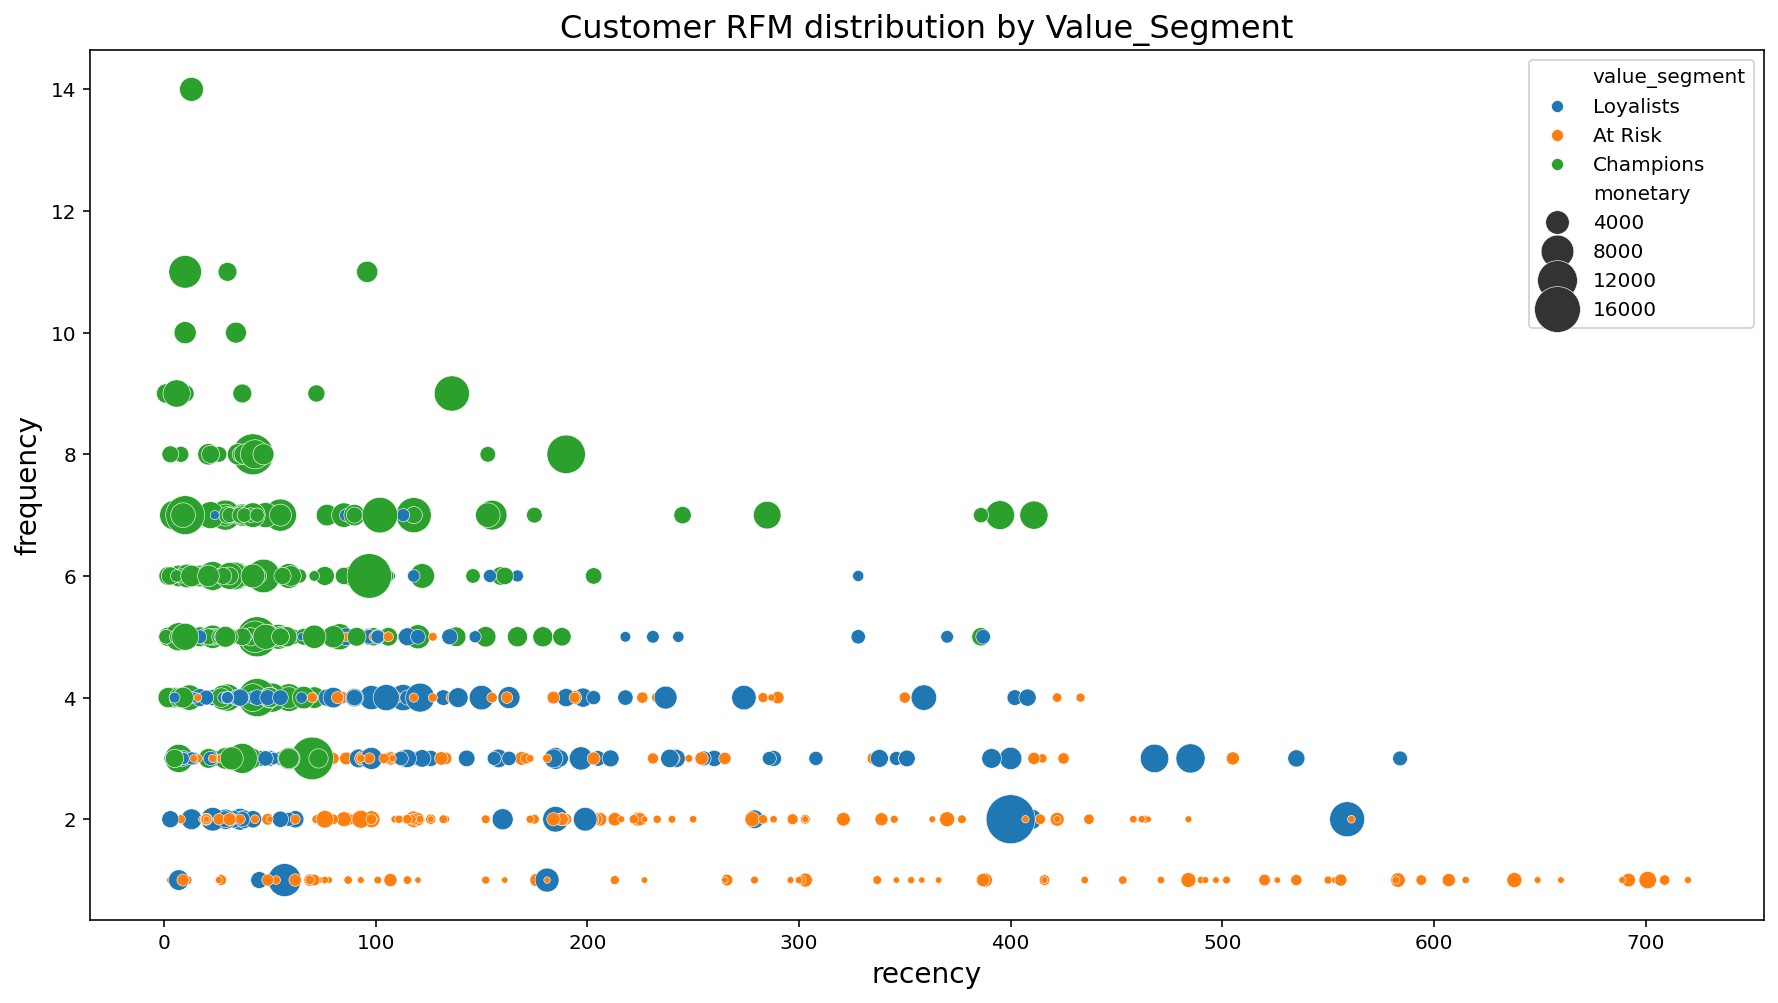

In [20]:
# Let's do a scatter plot to explore the distribution of customers' RFM profiles. 
# Hint: Do a scatter plot of frequency vs recency with monetary being the size of the points.

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=rfm_df, x='recency', y='frequency', size=rfm_df['monetary'], hue='value_segment', sizes=(10,600))
ax.set_xlabel('recency', fontsize=14)
ax.set_ylabel('frequency', fontsize=14)
ax.set_title('Customer RFM distribution by Value_Segment', fontsize=16)
plt.show()


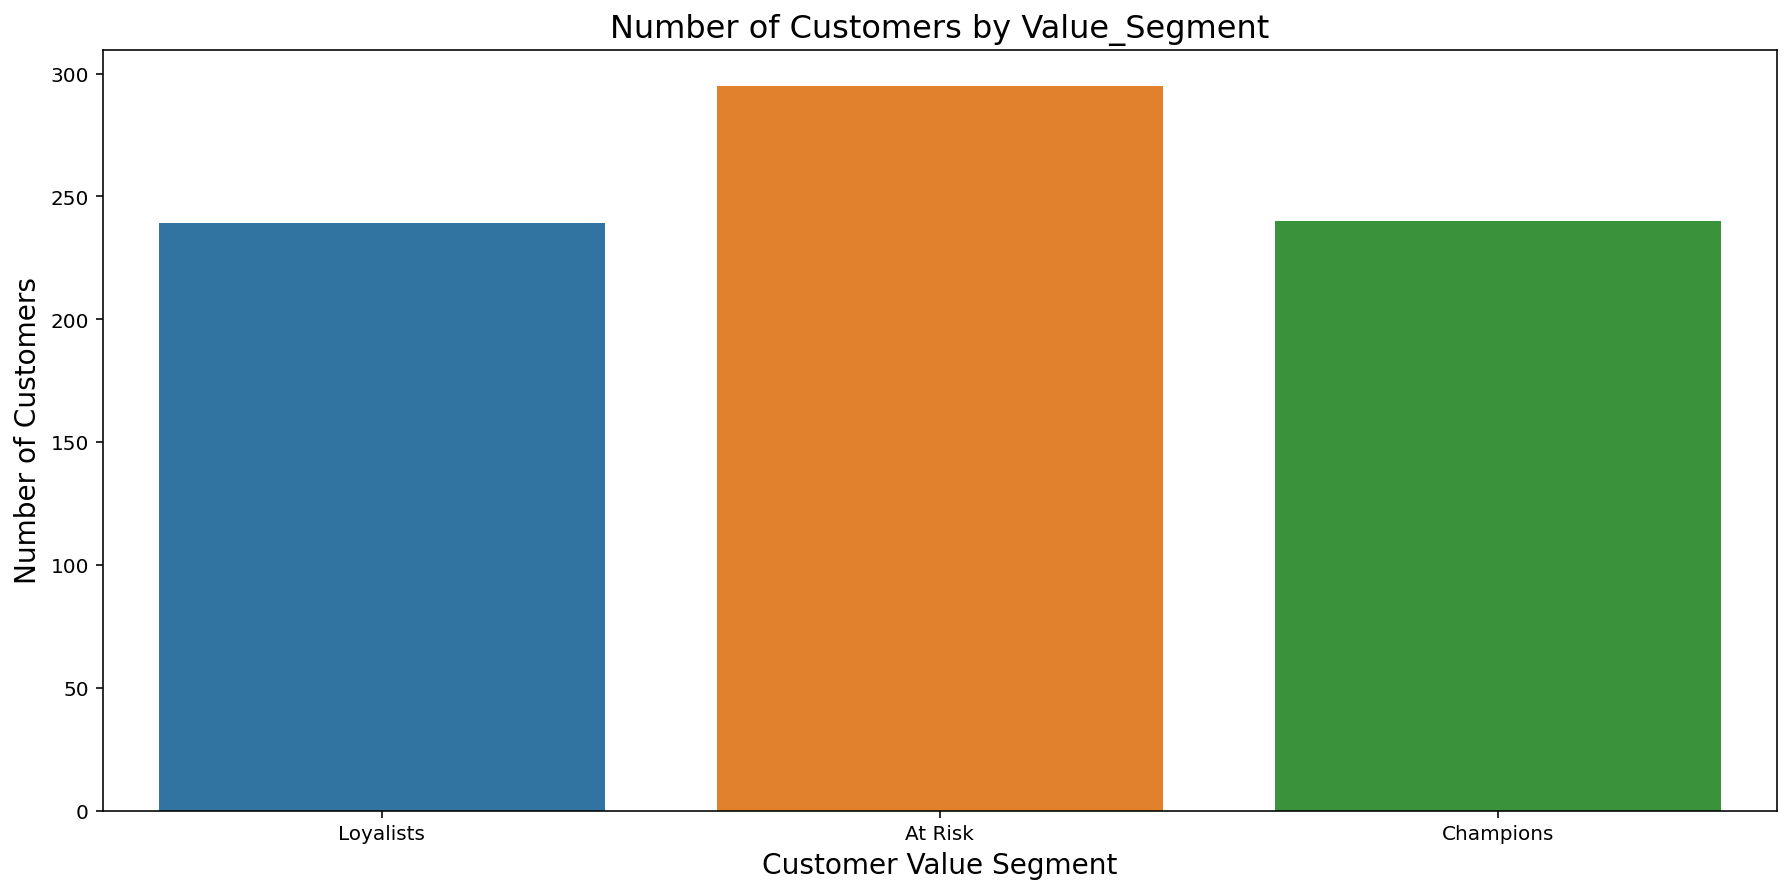

In [21]:
# Check the distribution of customers by value_segment
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=rfm_df, x='value_segment', hue='value_segment')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)
ax.set_title('Number of Customers by Value_Segment', fontsize=16)
plt.show()


###### **Adding RFM Variables to Original Dataset for more Insights**

Next, we will add the RFM Value Segment labels to the obs\_df transaction data that was originally used for performing the RFM analysis. obs_df dataframe conrtains the last 2 years of transaction data. This will help us understand the customer purchasing behaviors of each customer value segment by analysing other transaction features for more insights.



In [22]:
obs_df['value_segment'] = obs_df['Customer ID'].apply(lambda x : rfm_df.loc[x,'value_segment'])
df2 = obs_df.copy()
df2.head(5)

/tmp/ipykernel_228/3360337230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df['value_segment'] = obs_df['Customer ID'].apply(lambda x : rfm_df.loc[x,'value_segment'])


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipdate,Shipping Duration,value_segment
4,CA-2016-139409,2016-09-05,2016-09-07,First Class,FW-14395,Fred Wasserman,Corporate,United States,New York City,New York,...,Technology,Phones,"LF Elite 3D Dazzle Designer Hard Case Cover, L...",43.60,4,0.0,12.2080,2,2,At Risk
6,CA-2017-140480,2017-07-08,2017-07-12,Standard Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,...,Furniture,Furnishings,Tensor Track Tree Floor Lamp,39.98,2,0.0,9.1954,4,4,Loyalists
7,CA-2016-161543,2016-05-10,2016-05-16,Standard Class,RD-19720,Roger Demir,Consumer,United States,Seattle,Washington,...,Office Supplies,Paper,Xerox 1965,11.96,2,0.0,5.8600,6,6,Champions
8,CA-2016-152730,2016-05-30,2016-06-04,Standard Class,EM-14140,Eugene Moren,Home Office,United States,Superior,Wisconsin,...,Office Supplies,Art,Newell 333,5.56,2,0.0,1.4456,5,5,Champions
10,CA-2016-164511,2016-11-19,2016-11-24,Standard Class,DJ-13630,Doug Jacobs,Consumer,United States,New York City,New York,...,Office Supplies,Binders,Avery Hanging File Binders,14.35,3,0.2,4.6644,5,5,Loyalists


In [23]:
# Check the distribution of number of customers in each rfm value segment

df2.groupby(['value_segment'])['Customer ID'].nunique()

value_segment
At Risk      295
Champions    240
Loyalists    239
Name: Customer ID, dtype: int64

### **Product Category Analysis**

In [24]:
# Let's create a new column called 'unit_cost' containing the ratio of Sales to quantity for each transaction.

df2['unit_cost'] = df2['Sales']/df2['Quantity']
df2['unit_cost']

4       10.900000
6       19.990000
7        5.980000
8        2.780000
10       4.783333
          ...    
9988    91.685556
9991     4.623333
9992     9.880000
9994     3.280000
9996    59.990000
Name: unit_cost, Length: 5910, dtype: float64

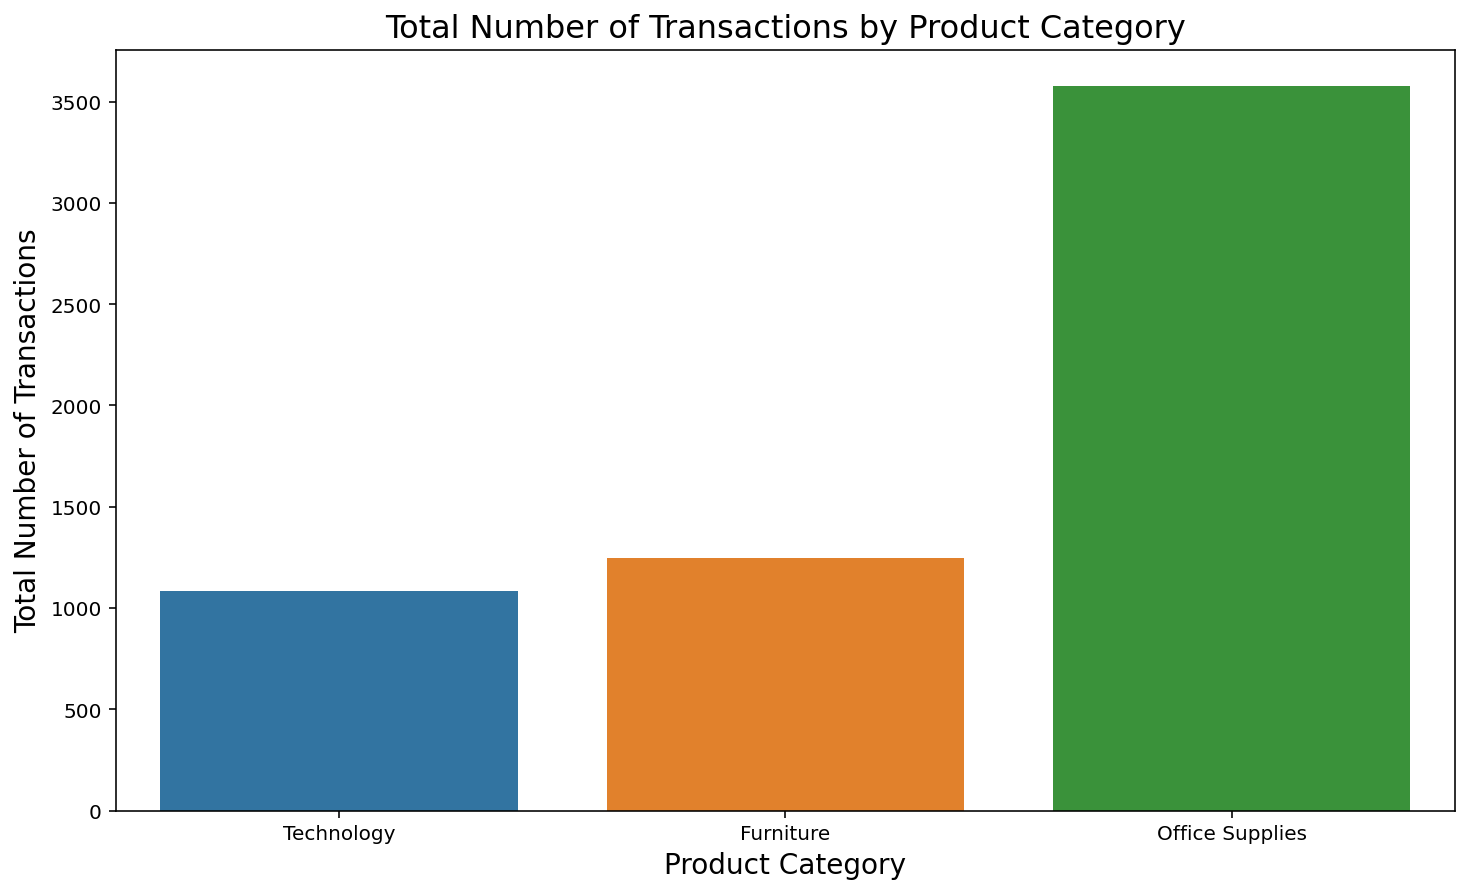

In [25]:
# Check the number of transactions by Product Category
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=df2, x='Category', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Product Category', fontsize=16)
plt.show()

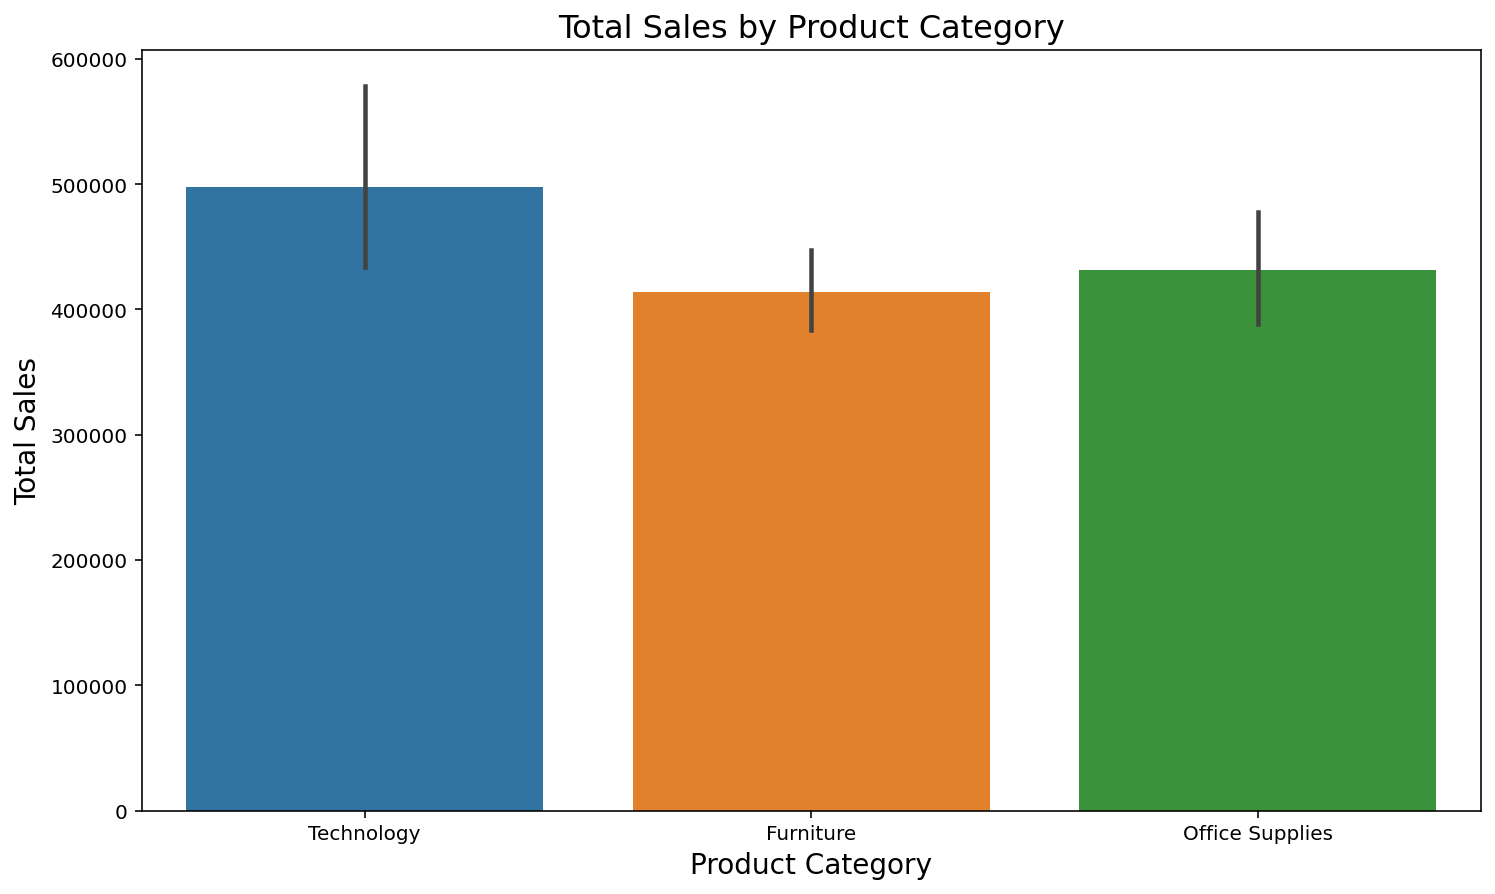

In [26]:
# Check which Product Category has the largest total amount of Sales

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=df2, x='Category',  y='Sales', estimator=np.sum, hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Total Sales', fontsize=14)
ax.set_title(f'Total Sales by Product Category', fontsize=16)
plt.show()

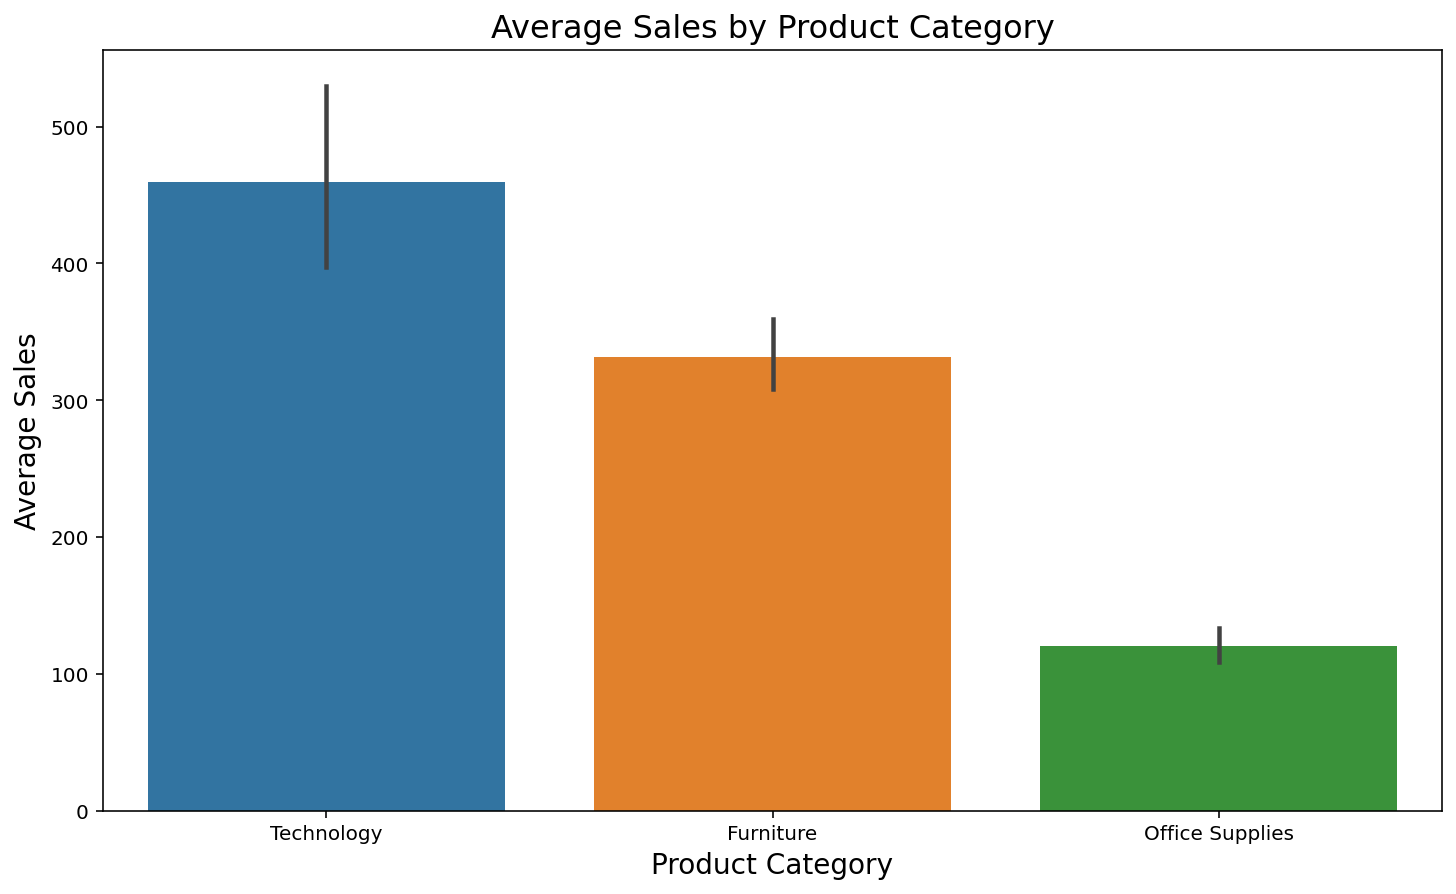

In [27]:
# Check which Product Category has the highest average Sales
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=df2, x='Category',  y='Sales', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Average Sales', fontsize=14)
ax.set_title(f'Average Sales by Product Category', fontsize=16)
plt.show()

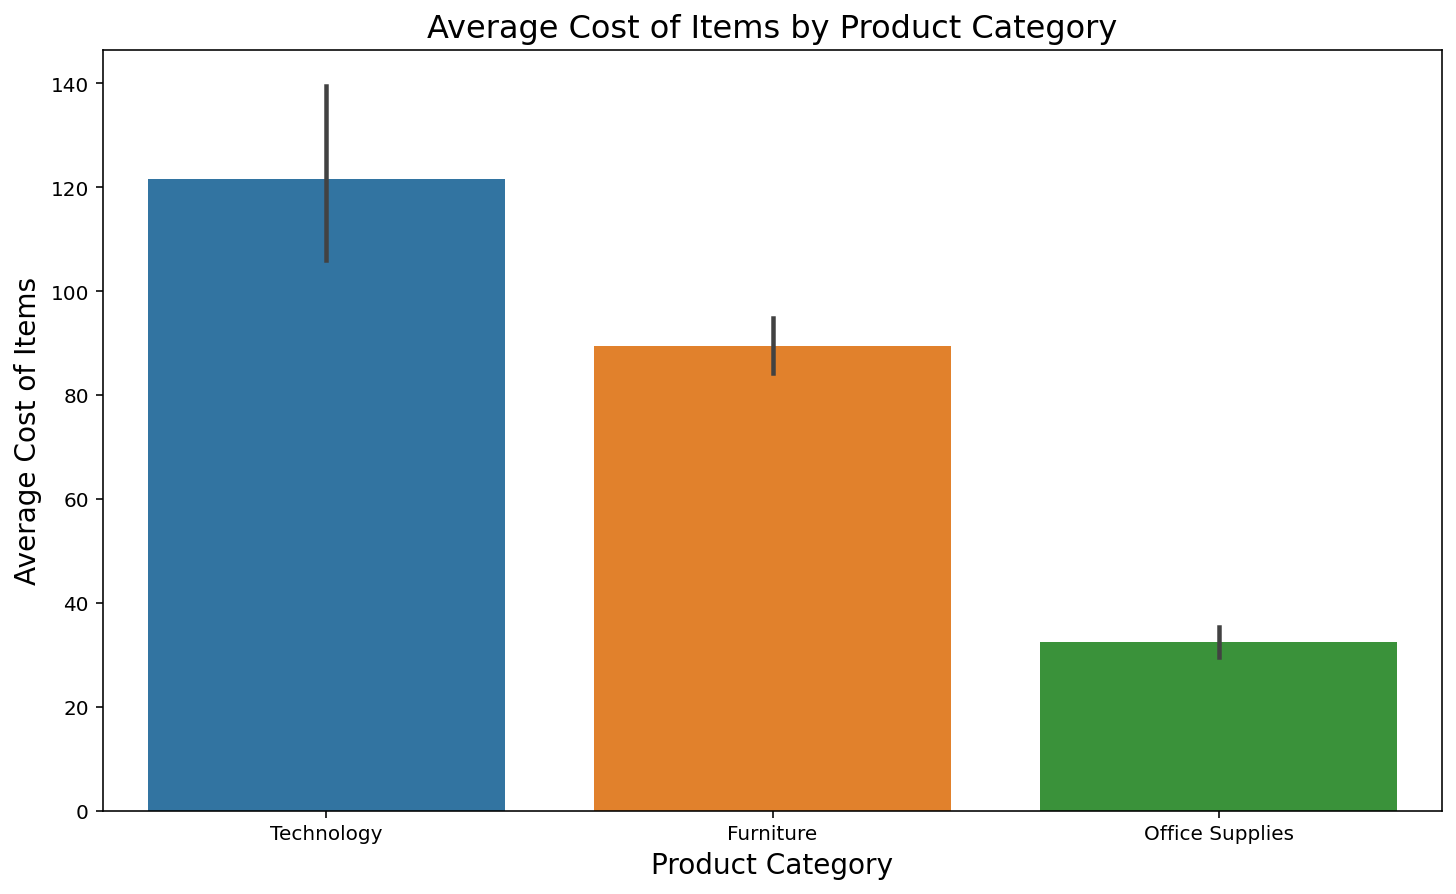

In [28]:
# Check the average cost of each Product Category Item
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=df2, x='Category', y='unit_cost', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Average Cost of Items', fontsize=14)
ax.set_title(f'Average Cost of Items by Product Category', fontsize=16)
plt.show()

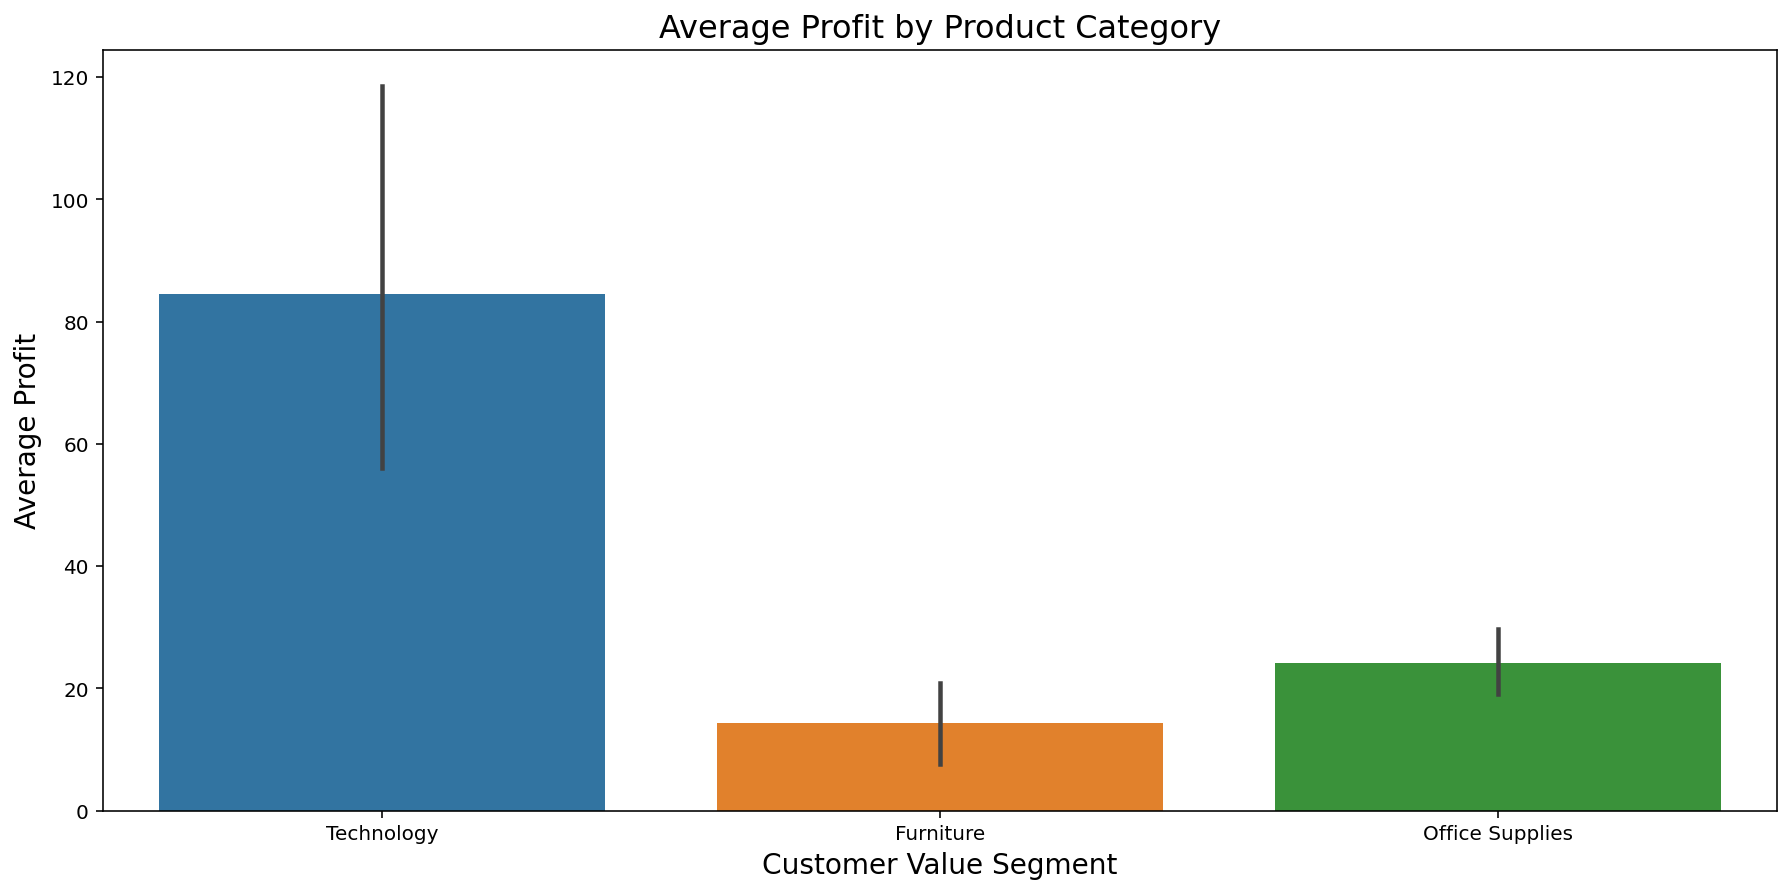

In [29]:
# Check which Product Category is the most profitable
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Category', y='Profit', estimator=np.mean, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title(f'Average Profit by Product Category', fontsize=16)
plt.show()


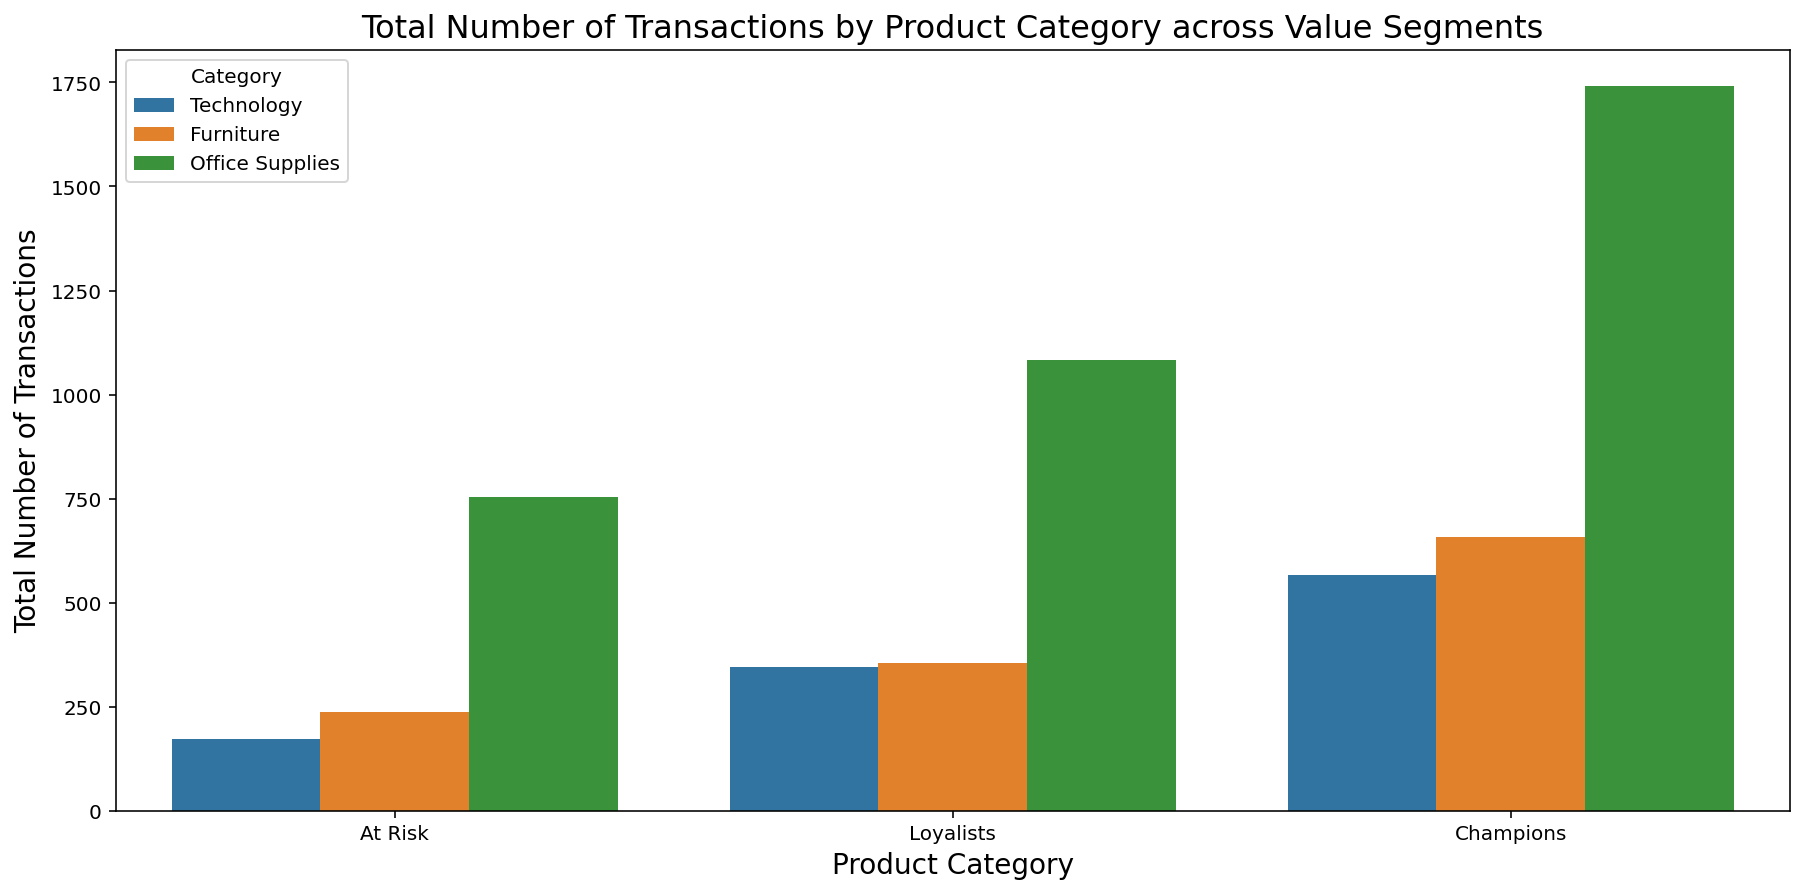

In [30]:
# Check the most shopped Product Category by rfm Value Segment

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='value_segment', hue='Category')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Product Category across Value Segments', fontsize=16)
plt.show()


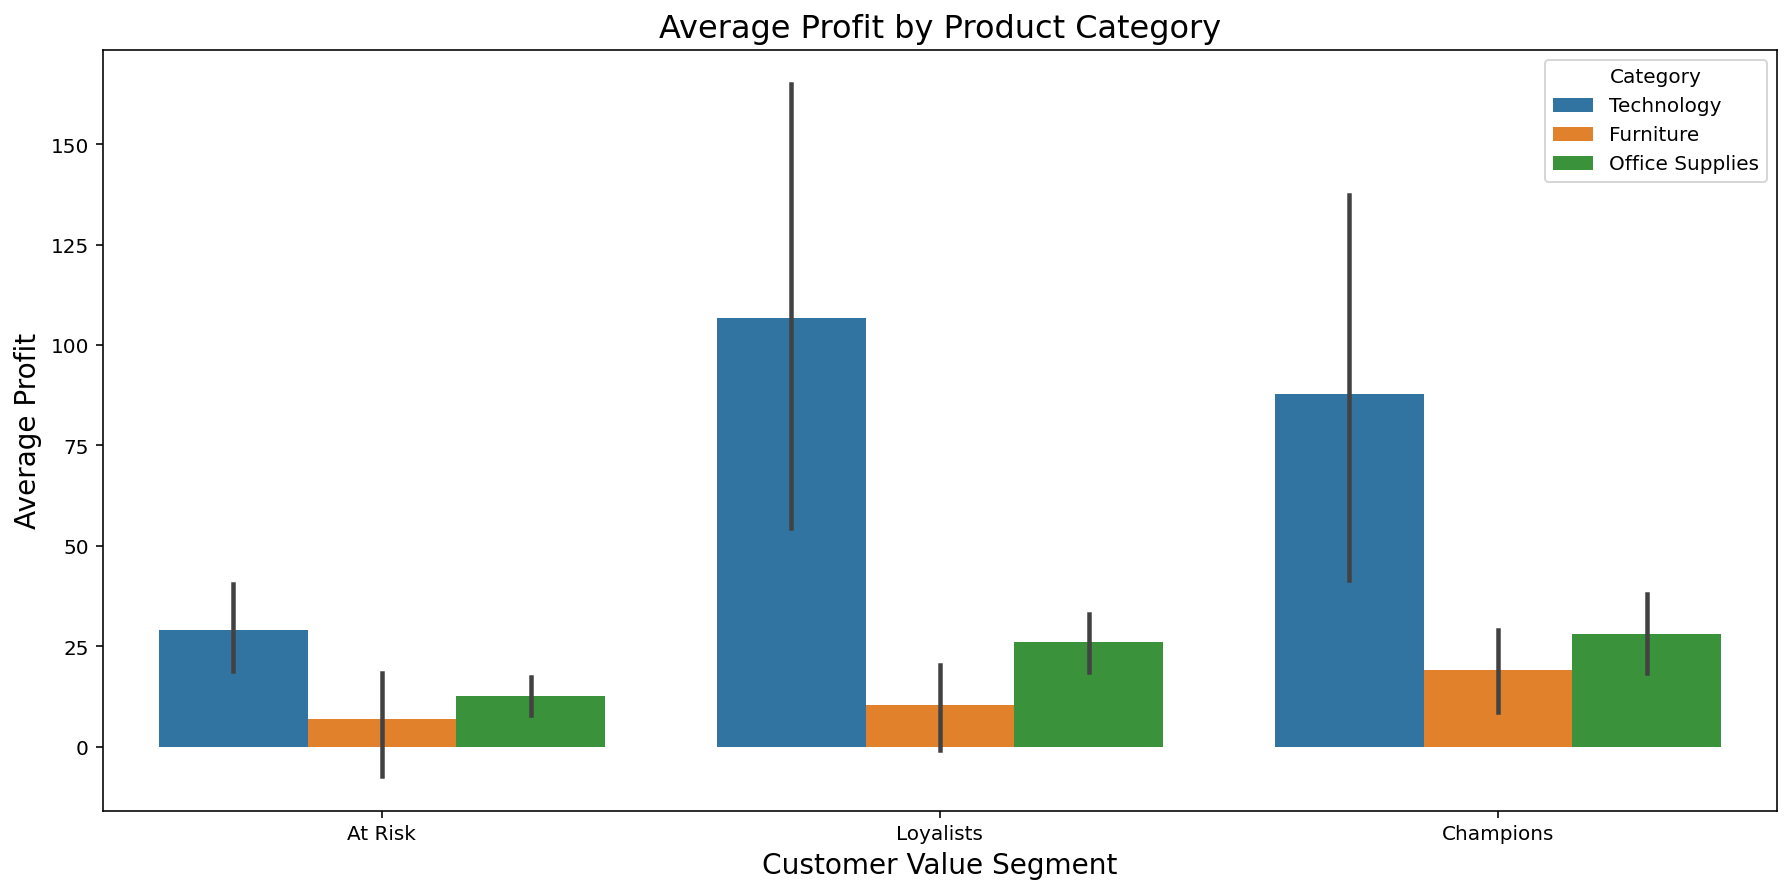

In [31]:
# Check the average profit by rfm value segment in each product category


# The Loyalists Value Segment has the highest average profit per product in the Technology Product Category. 

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.mean, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title(f'Average Profit by Product Category', fontsize=16)
plt.show()

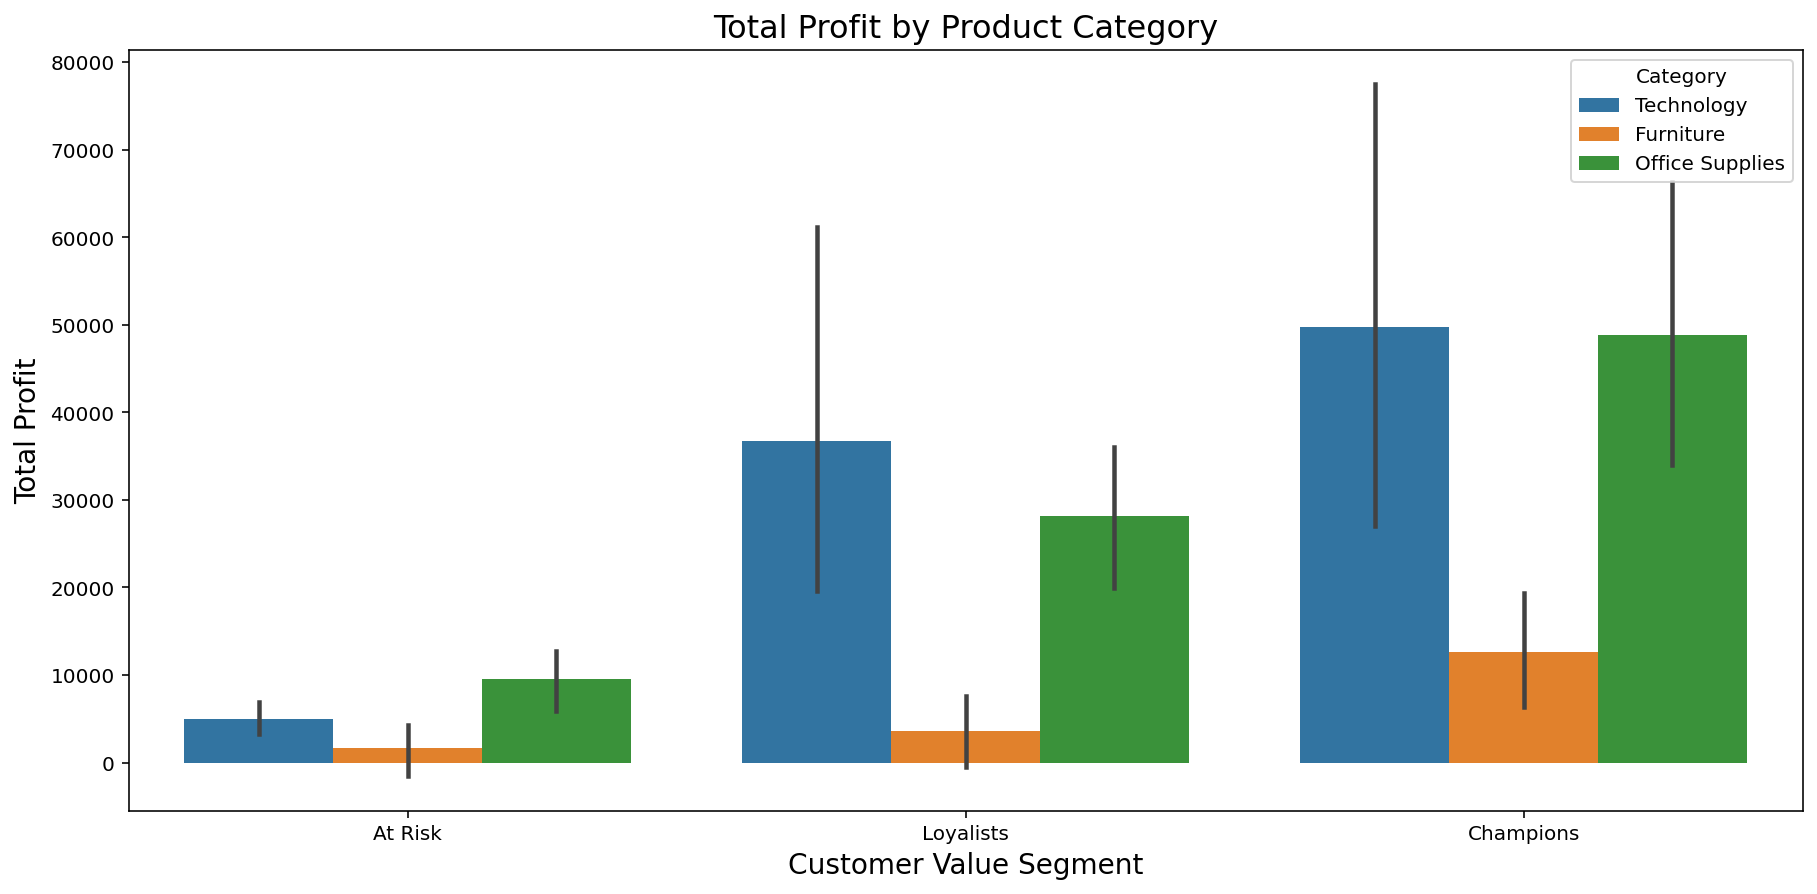

In [32]:
# Check the total profit by rfm value segment in each product category

# The Champions have the highest total profit in all three product categories.

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.sum, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Product Category', fontsize=16)
plt.show()


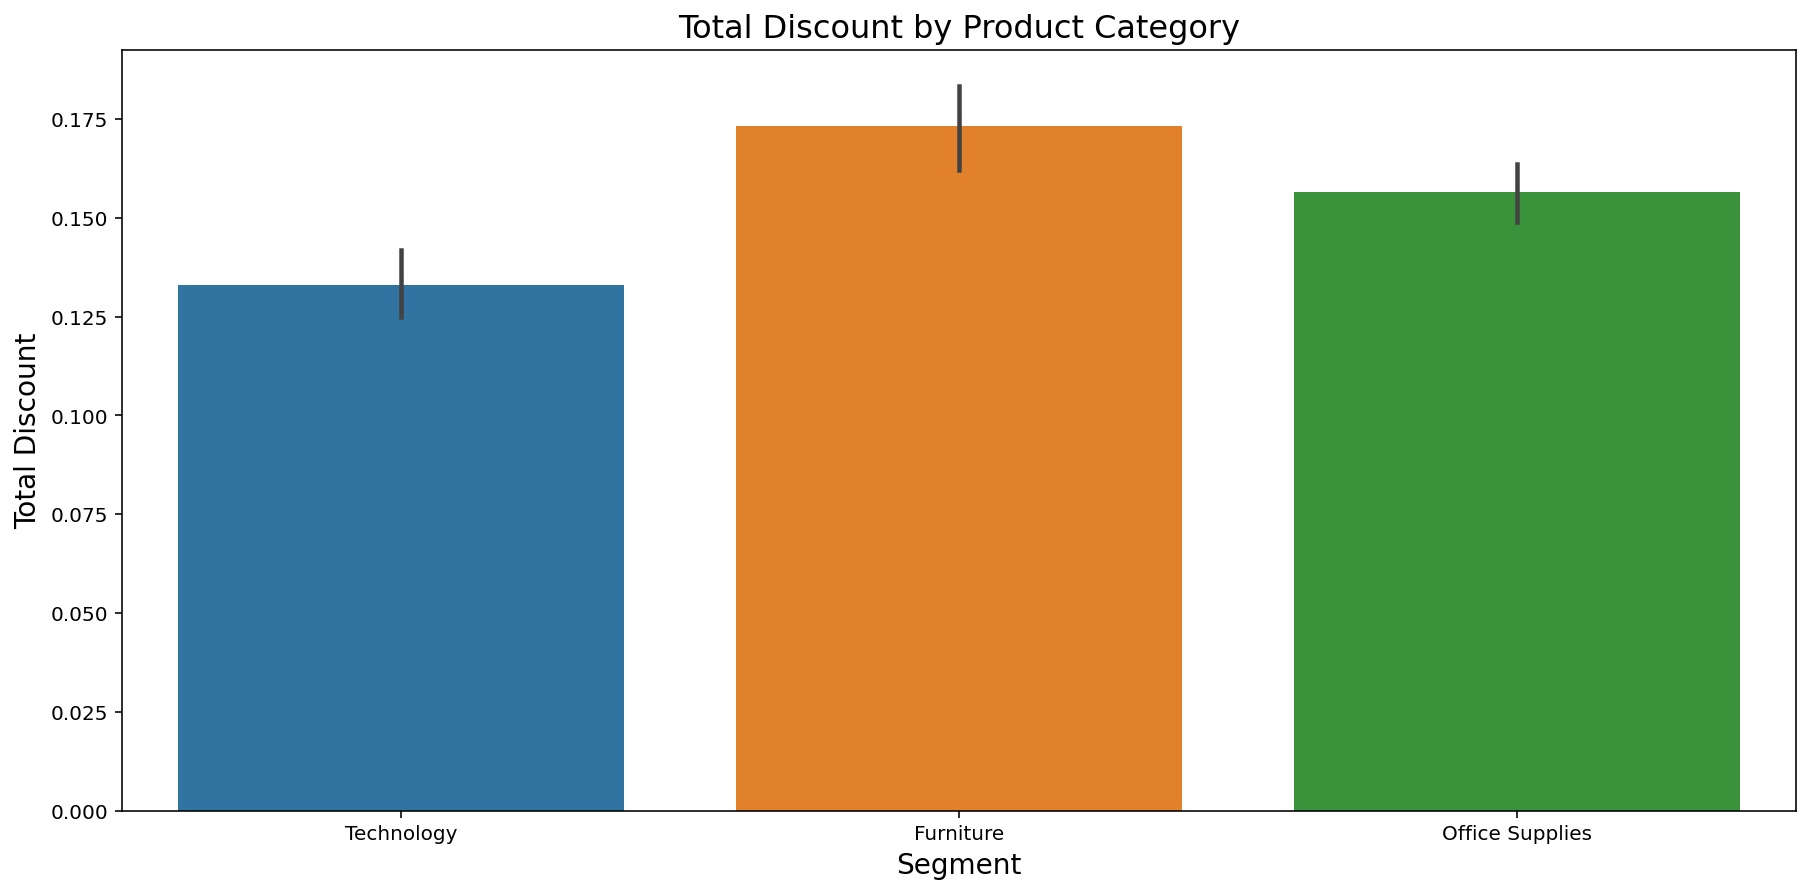

In [33]:
# Additional Insights here !!


fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Category', y='Discount', estimator=np.mean, hue='Category')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Discount', fontsize=14)
ax.set_title(f'Total Discount by Product Category', fontsize=16)
plt.show()


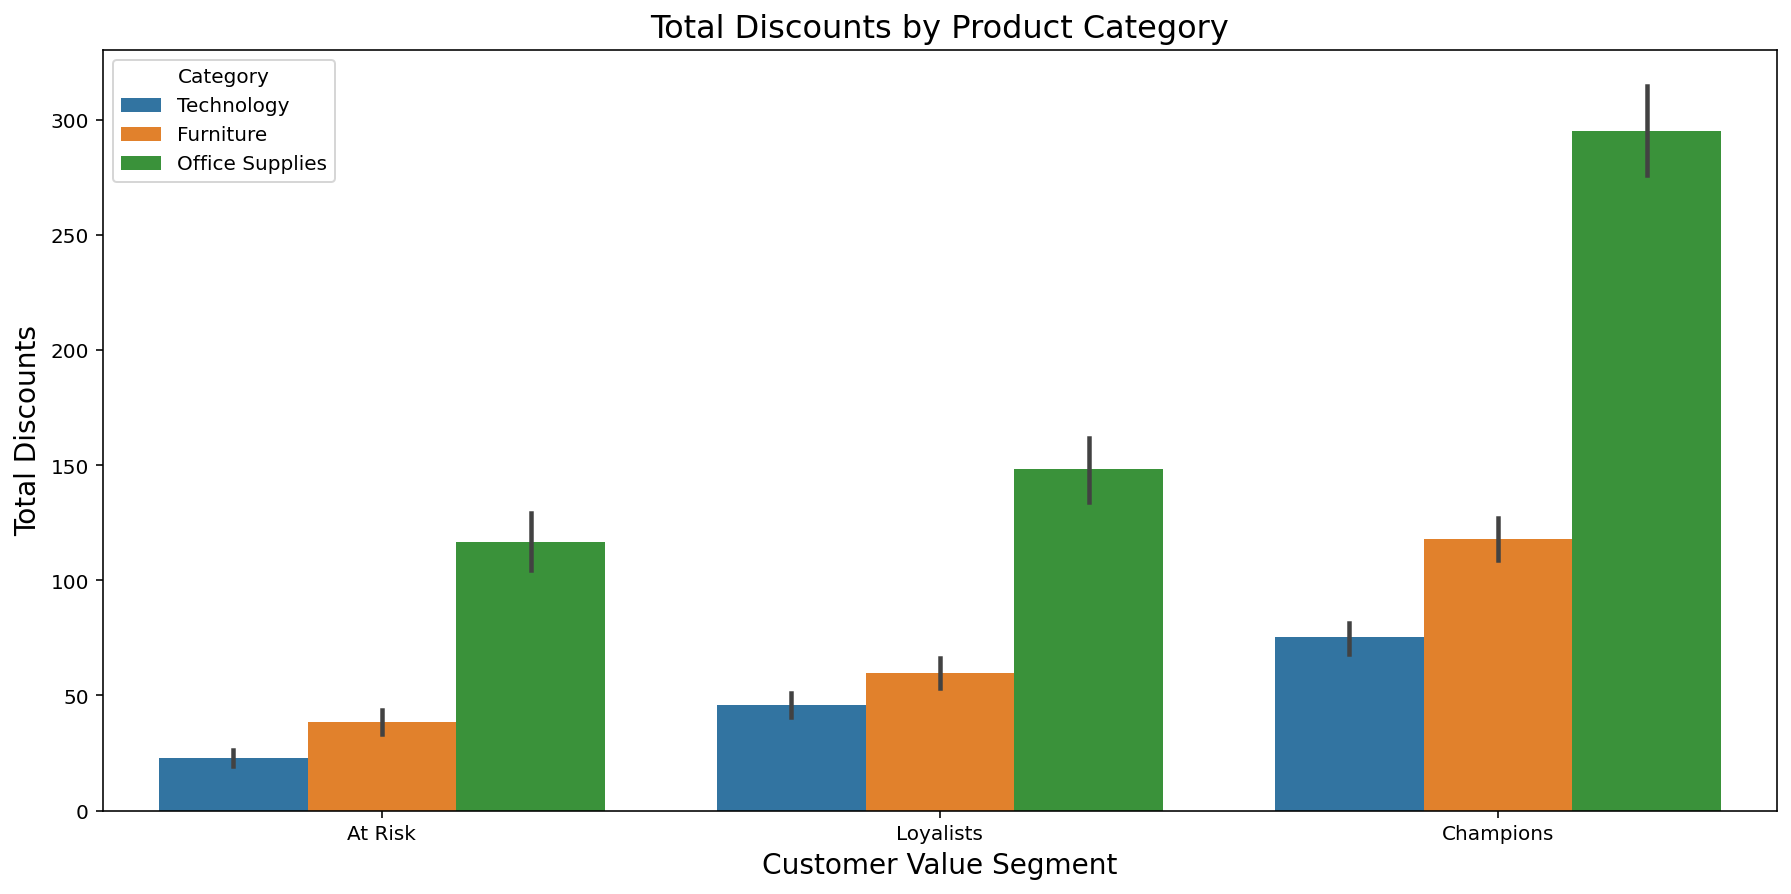

In [34]:
# Check the total amount of discounts by rfm value segment in each product category
# Office Supplies have the largest amount of discounts
# The Champions segment has the most discounts. We should check the average discounts too!!

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Discount', estimator=np.sum, hue='Category')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Total Discounts', fontsize=14)
ax.set_title(f'Total Discounts by Product Category', fontsize=16)
plt.show()



### **Ship Mode Analysis**

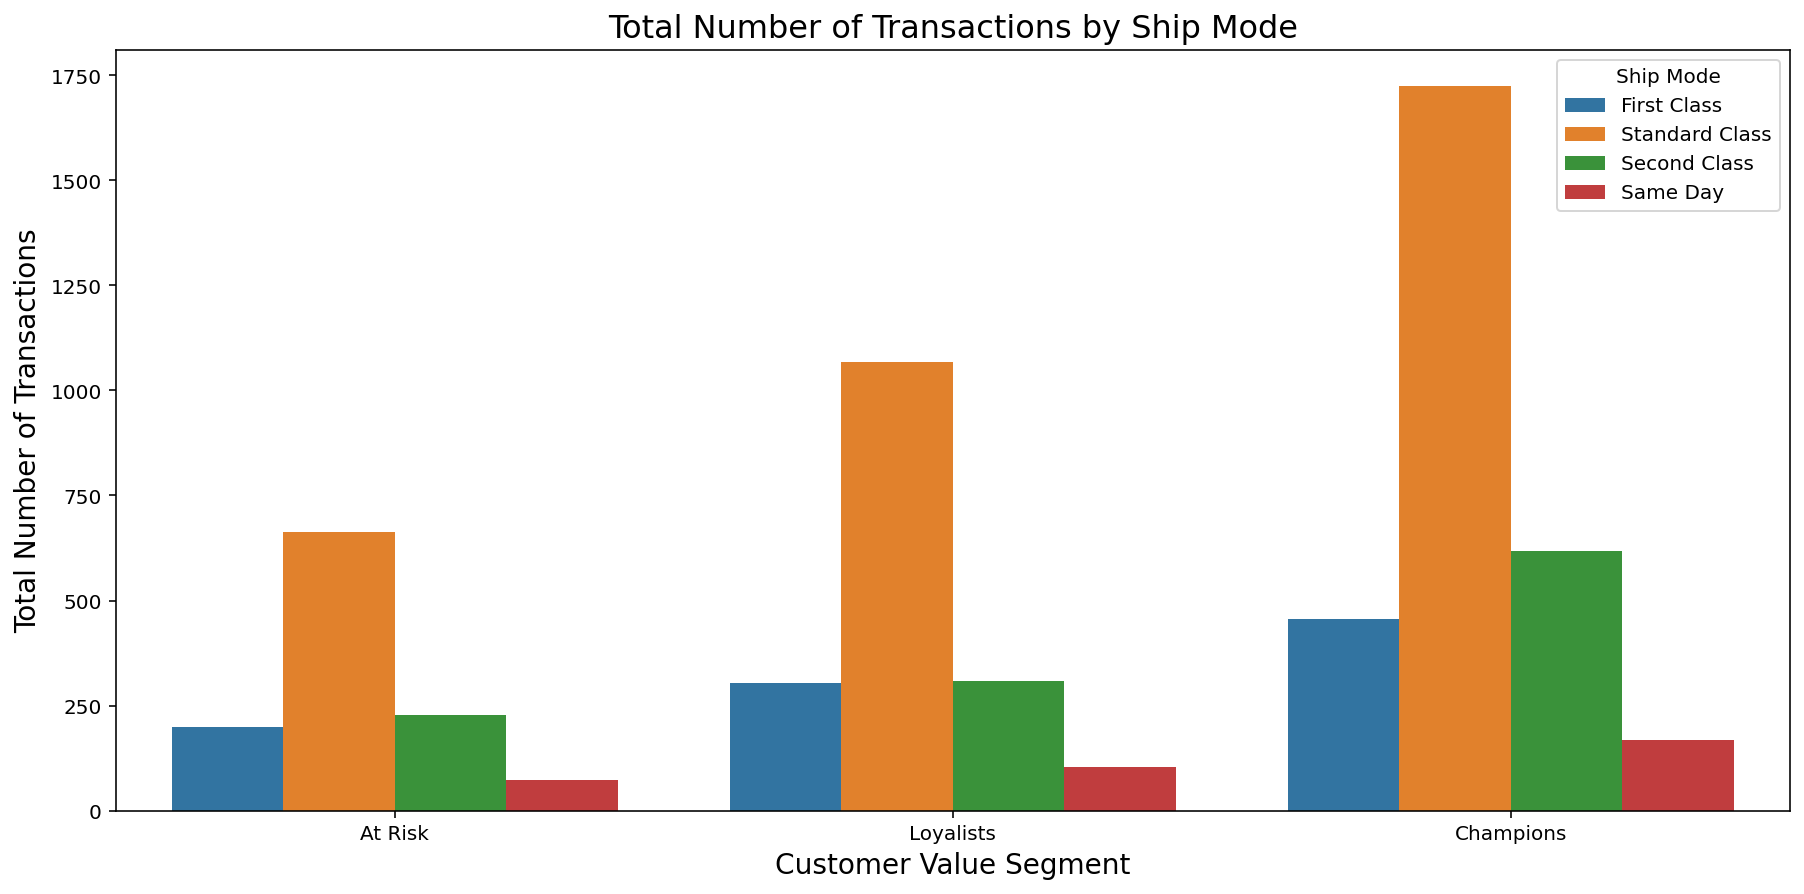

In [35]:
# Check which shipping mode is the most frequently used across rfm value segments

# The Standard Class is the most frequently used shipping mode cross all value segments.
# Same Day shipping mode is the least frequently used method.
# Champions value segment uses Standard Class and Second Class shipping modes the most

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='value_segment', hue='Ship Mode')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Ship Mode', fontsize=16)
plt.show()


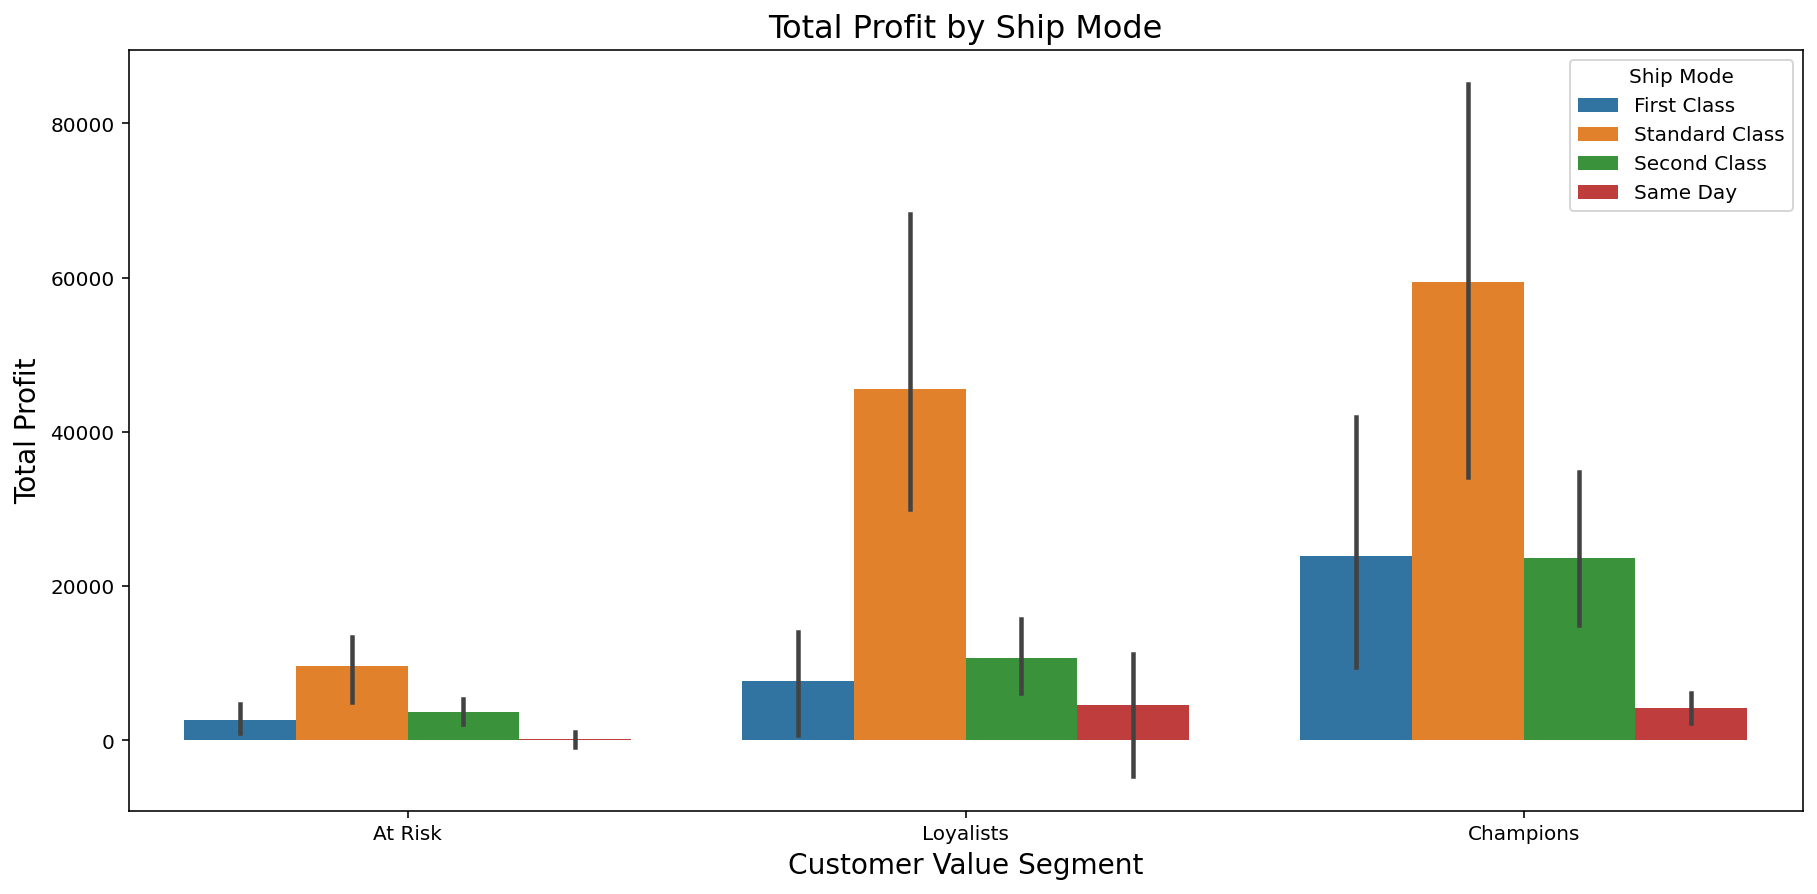

In [36]:
# Check the breakdown of Total Profit by rfm value_segment across all Ship Modes
# Superstore has lost some profits from transactions fulfilled by loyalists value segment using Same Day shipping mode

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.sum, hue='Ship Mode')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Ship Mode', fontsize=16)
plt.show()



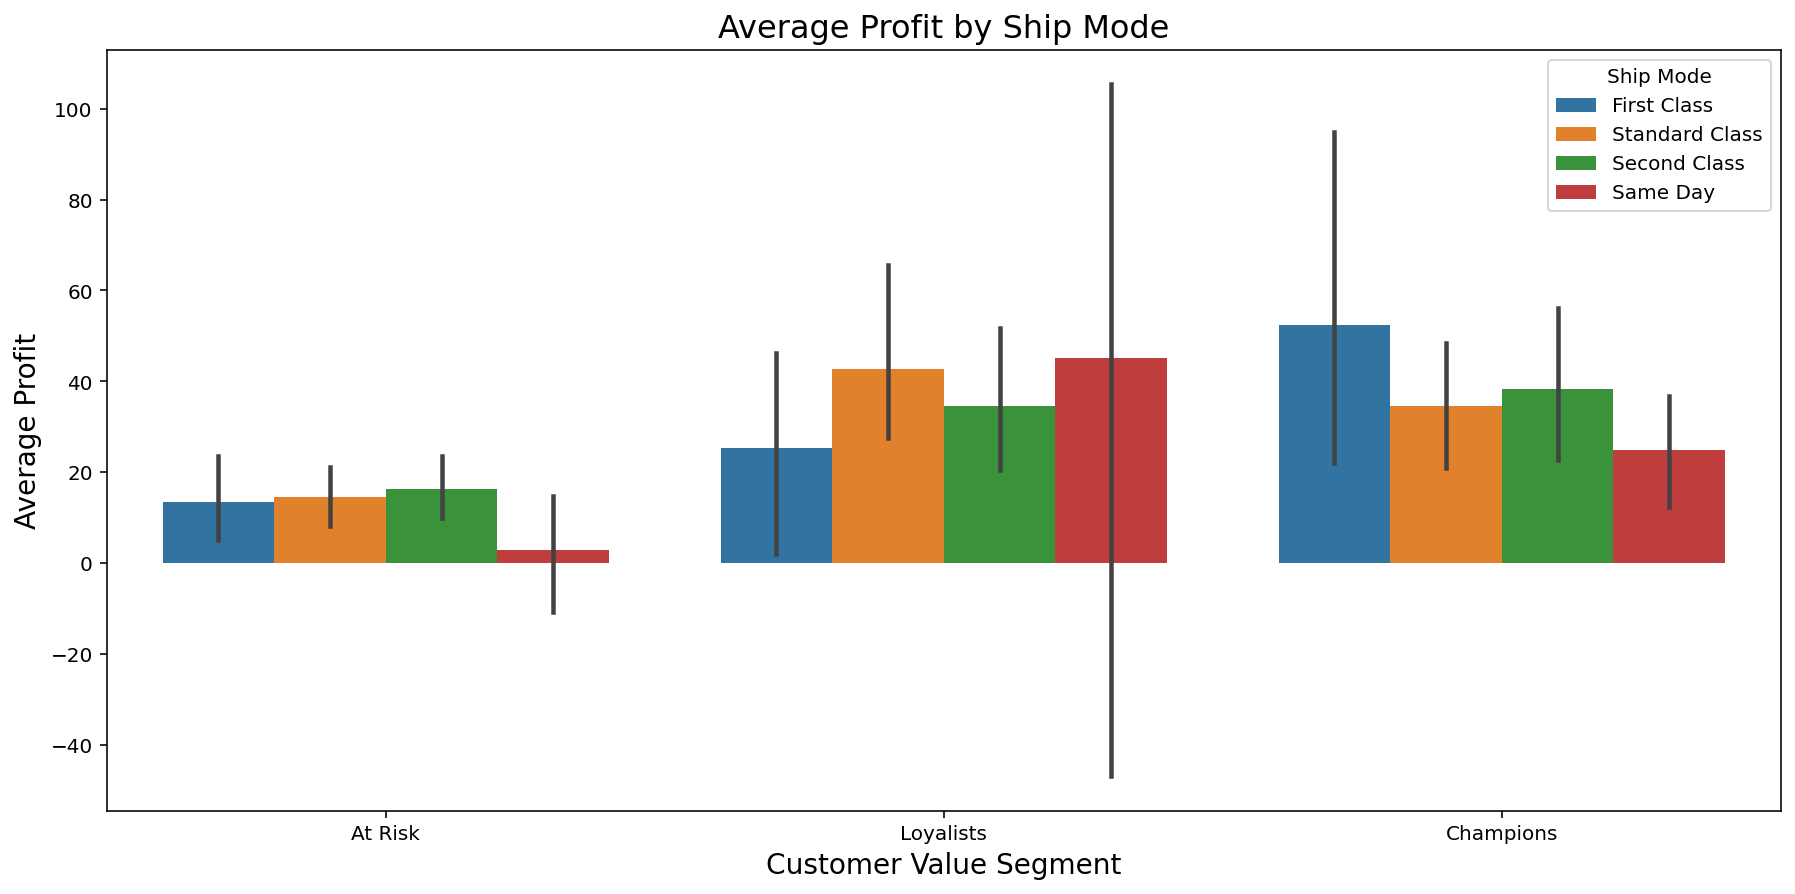

In [37]:
# Check the breakdown of Average Profit by rfm value_segment across all Ship Modes

# The Loyalists value segment has the highest proportion of transactions with negative profits in the Same Day shipping mode.

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.mean, hue='Ship Mode')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title(f'Average Profit by Ship Mode', fontsize=16)
plt.show()

### **Segment Analysis**

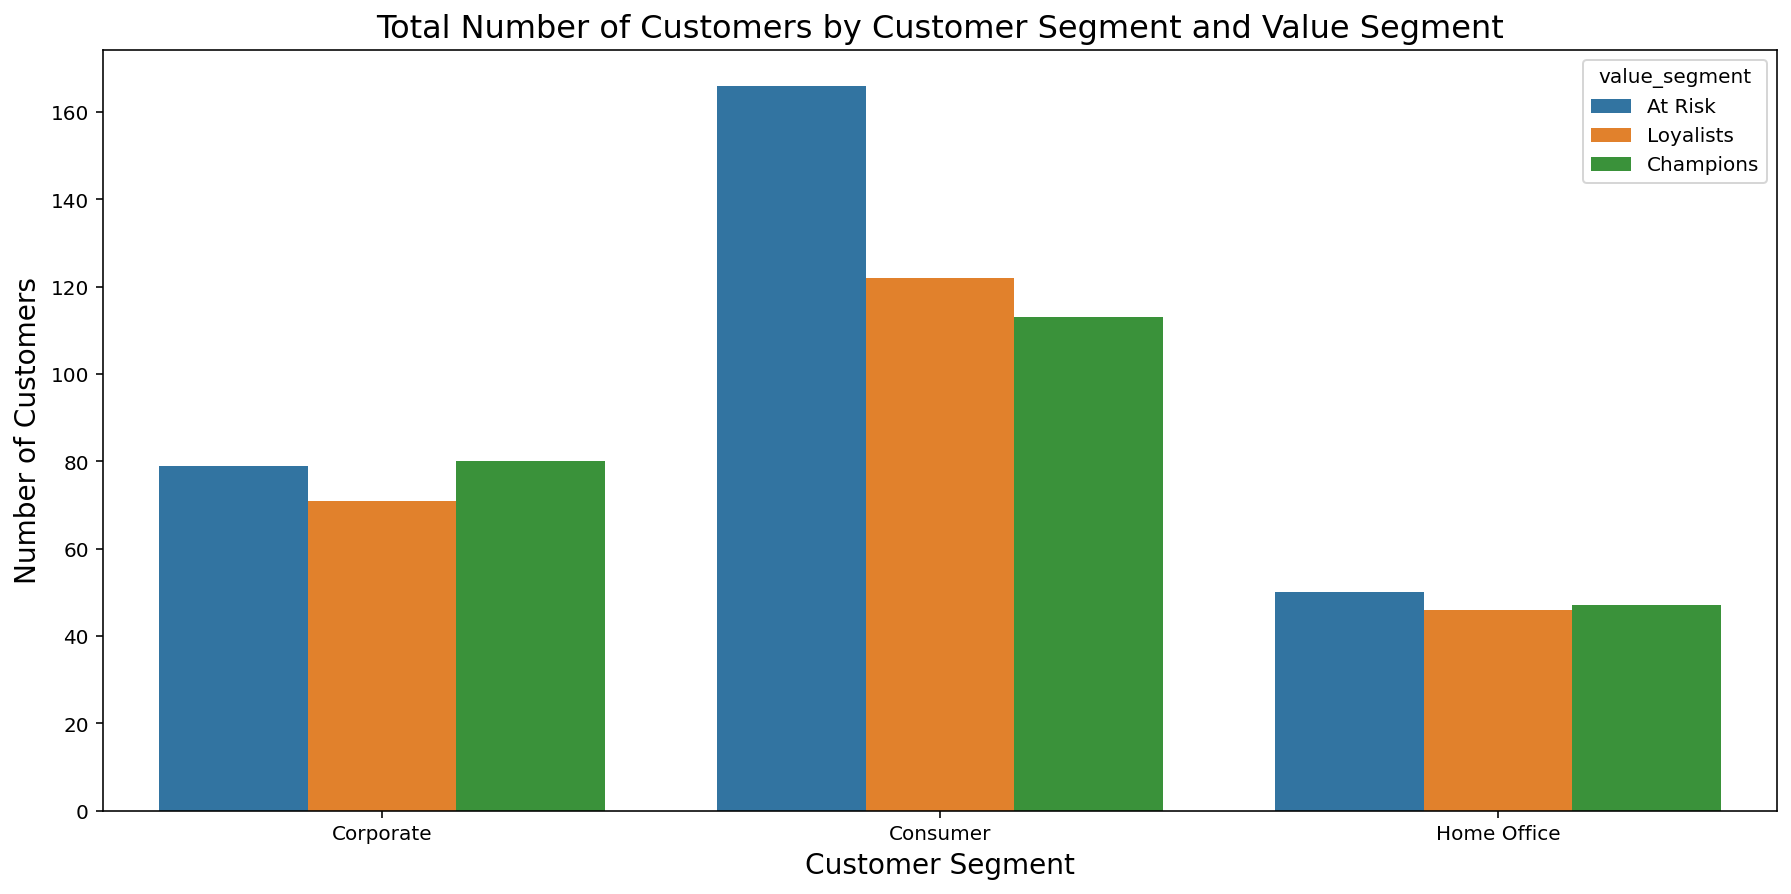

In [38]:
# Additional Insights here!!! 
# The Corporate& Home Office customer segments have a good mix of the three value segments while the Consumer segment has a higher percentage of At Risk value customers than Loyalists and Champions.

unique_customer_segments = df2[['Customer ID', 'Segment', 'value_segment']].drop_duplicates()
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=unique_customer_segments, x='Segment', hue='value_segment')
ax.set_xlabel('Customer Segment', fontsize=14)
ax.set_ylabel(f'Number of Customers', fontsize=14)
ax.set_title(f'Total Number of Customers by Customer Segment and Value Segment', fontsize=16)
plt.show()



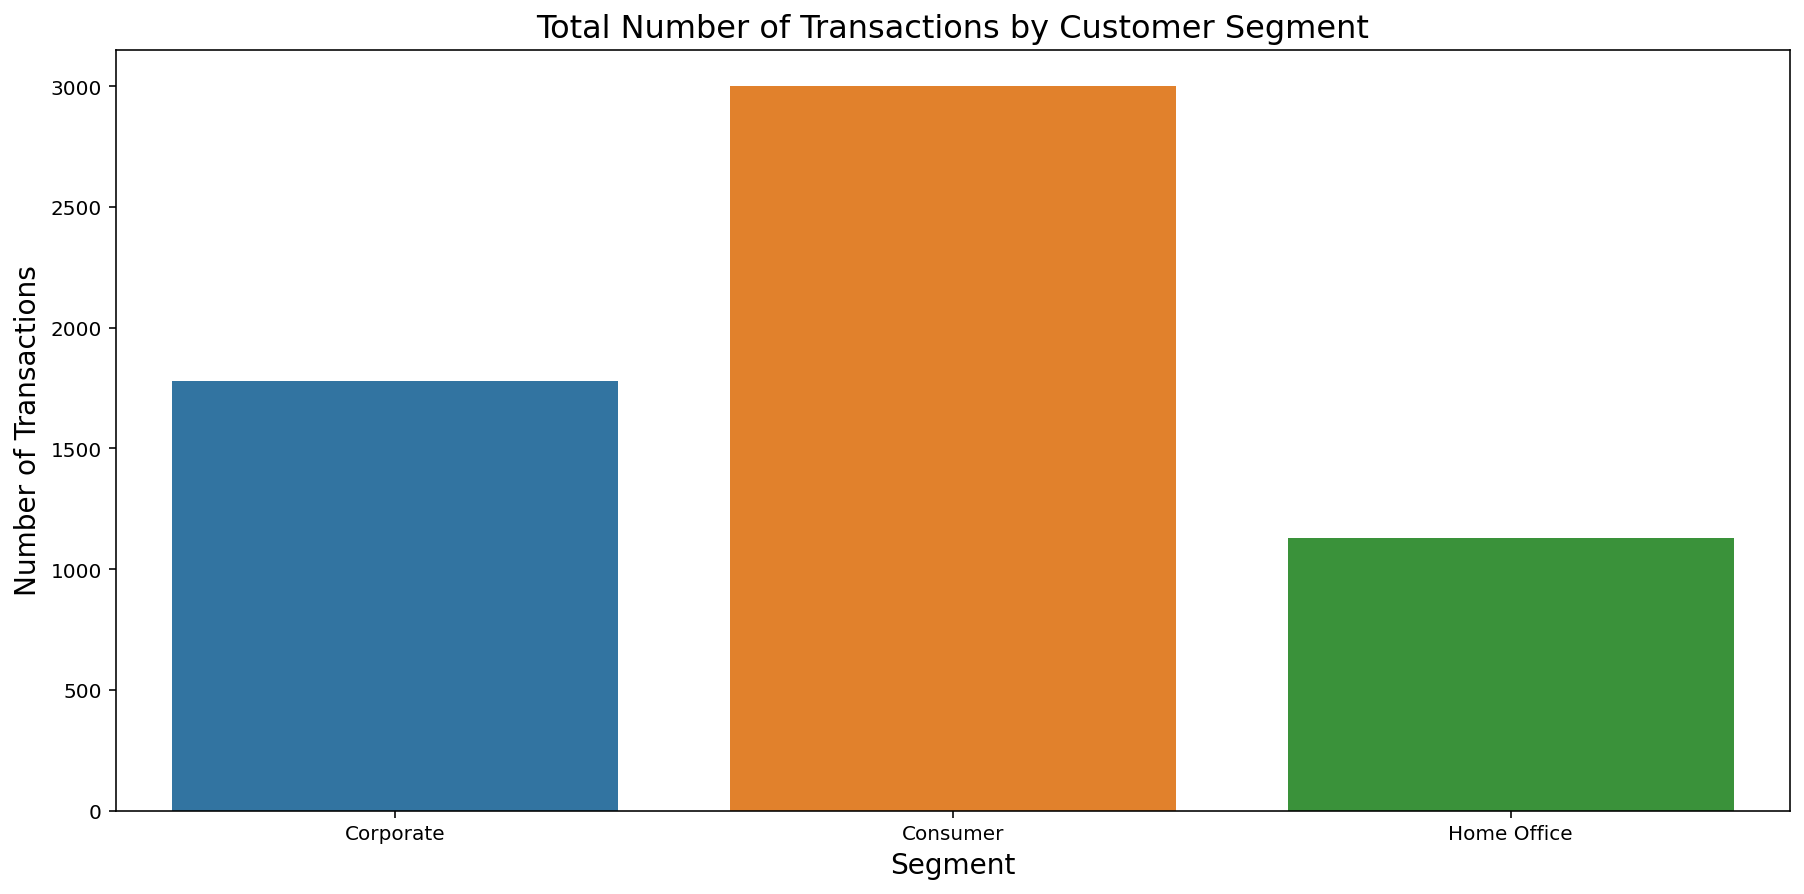

In [52]:
# Check total number of transactions by customer segment
# The Consumer customer segment has the highest number of transactions.

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Segment', hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Customer Segment', fontsize=16)
plt.show()


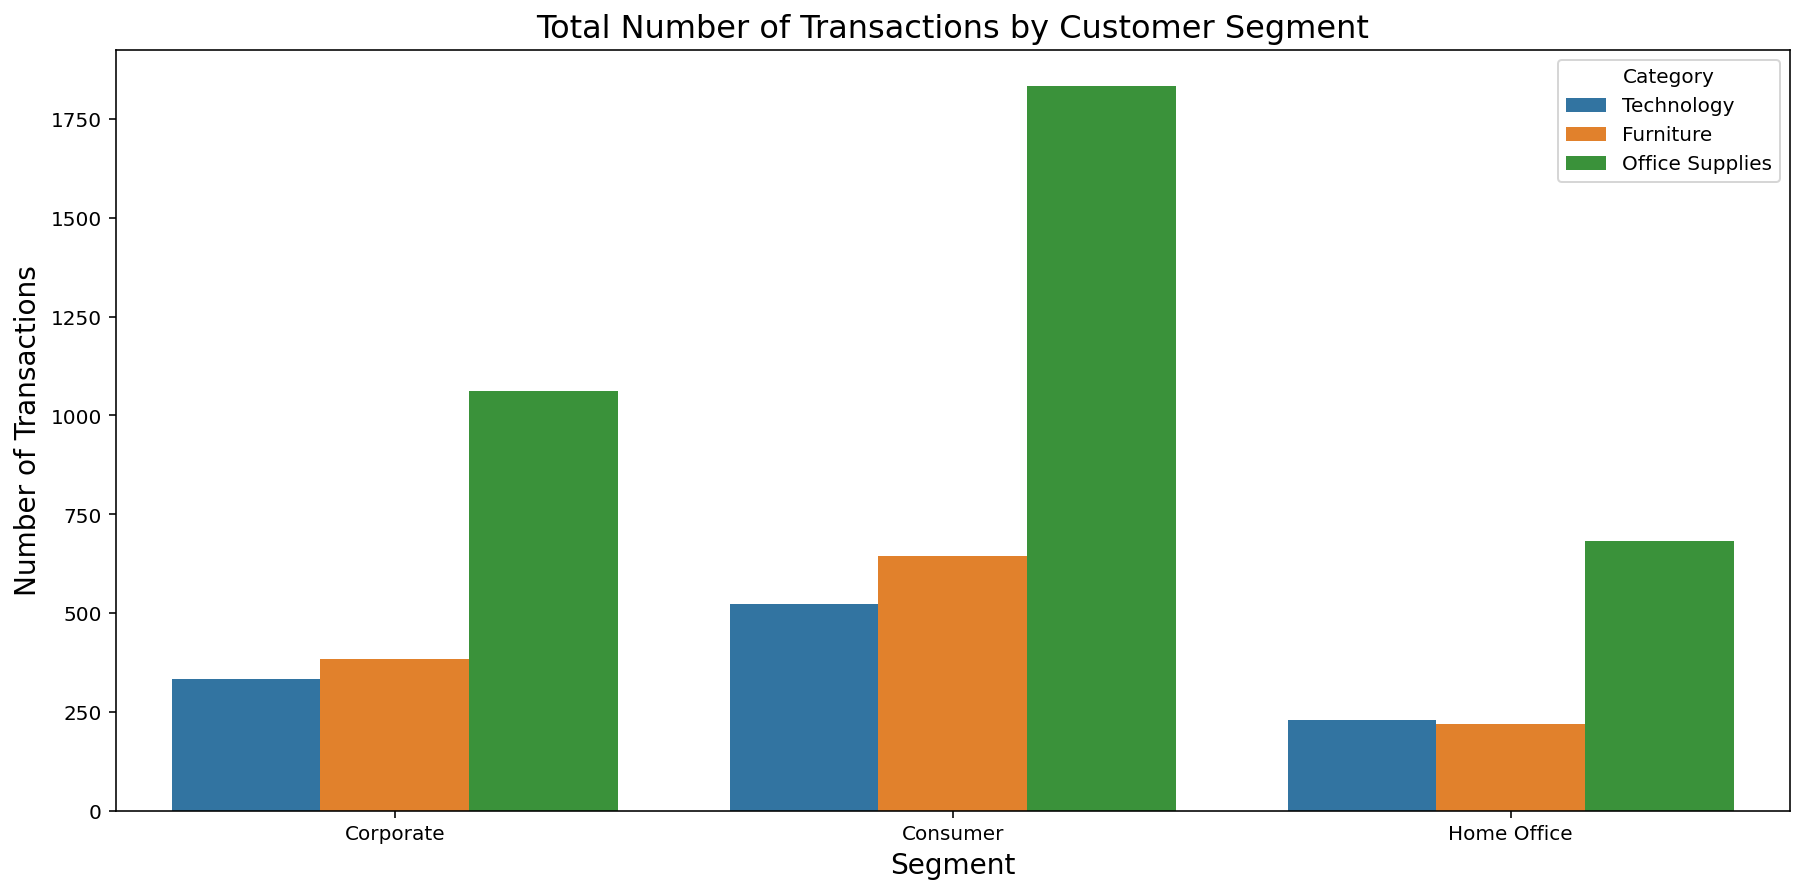

In [53]:
# Check which Product Categories are the Segments shopping the most?
# All segments shop more in the Office Supplies category but the Home Office Segment has a larger percentage of its' spend in Technology products

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Segment', hue='Category')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Customer Segment', fontsize=16)
plt.show()


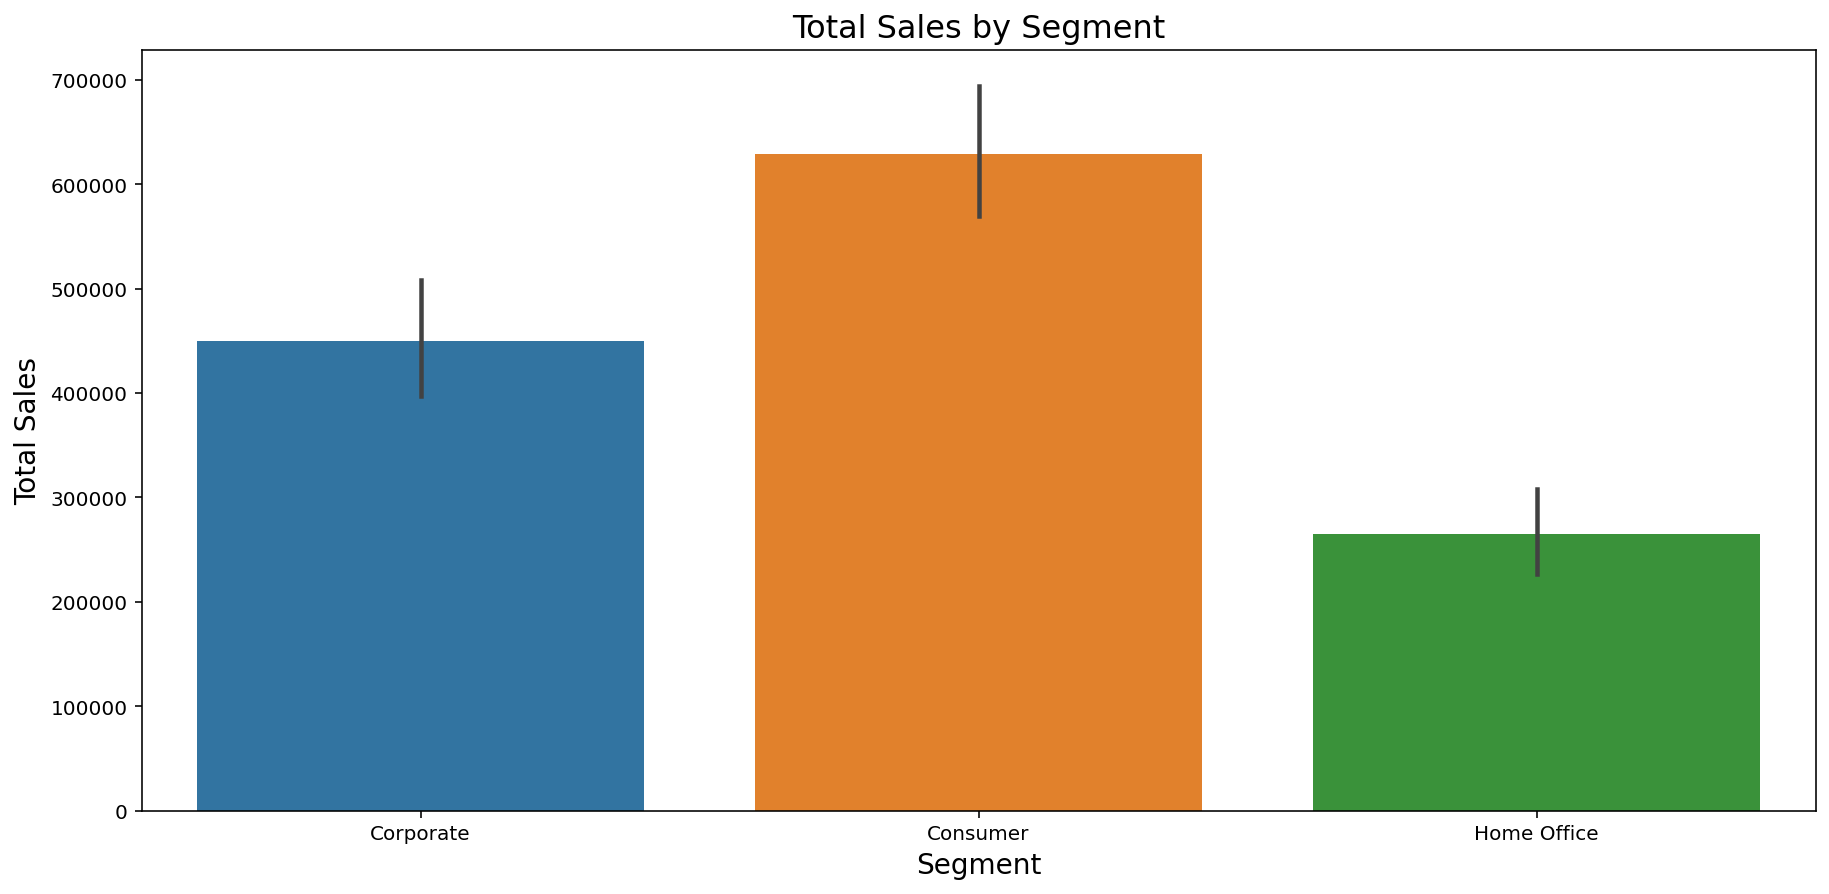

In [54]:
# Check the Customer Segment with most total Sales
# The Consumer Segment has the highest total Sales

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Sales', estimator=np.sum, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Sales', fontsize=14)
ax.set_title(f'Total Sales by Segment', fontsize=16)
plt.show()


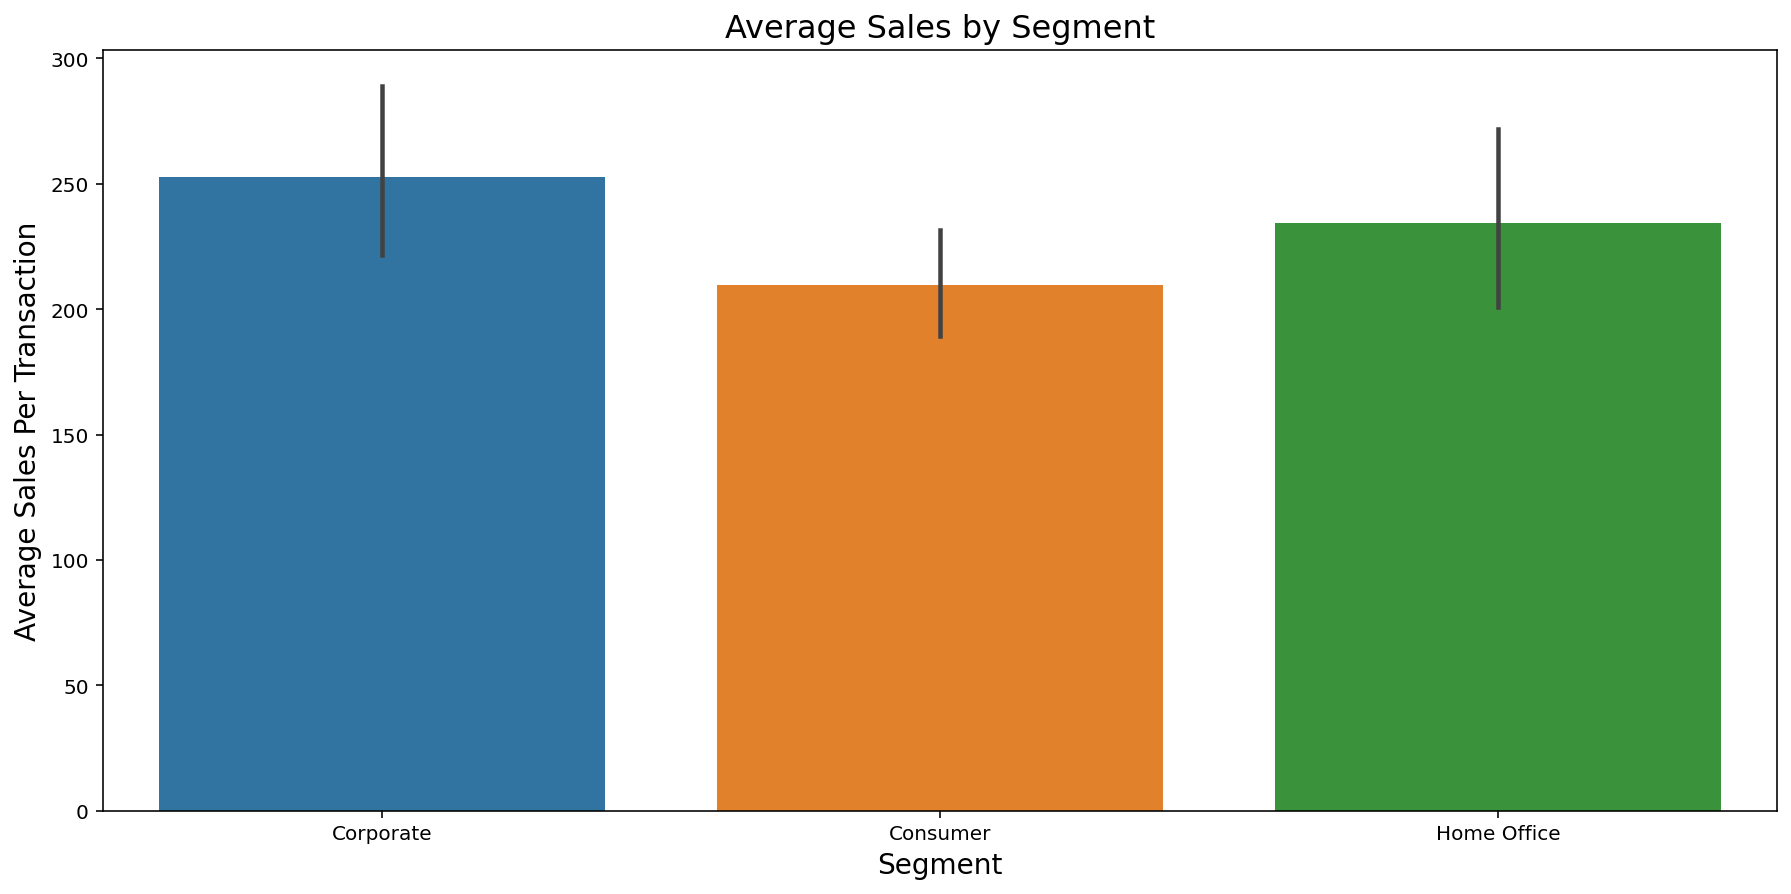

In [55]:
# Check the average Sales per Transaction across customer segments


# The Corporate Customer Segment has the highest average sales per transaction

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Sales', estimator=np.mean, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Average Sales Per Transaction', fontsize=14)
ax.set_title(f'Average Sales by Segment', fontsize=16)
plt.show()

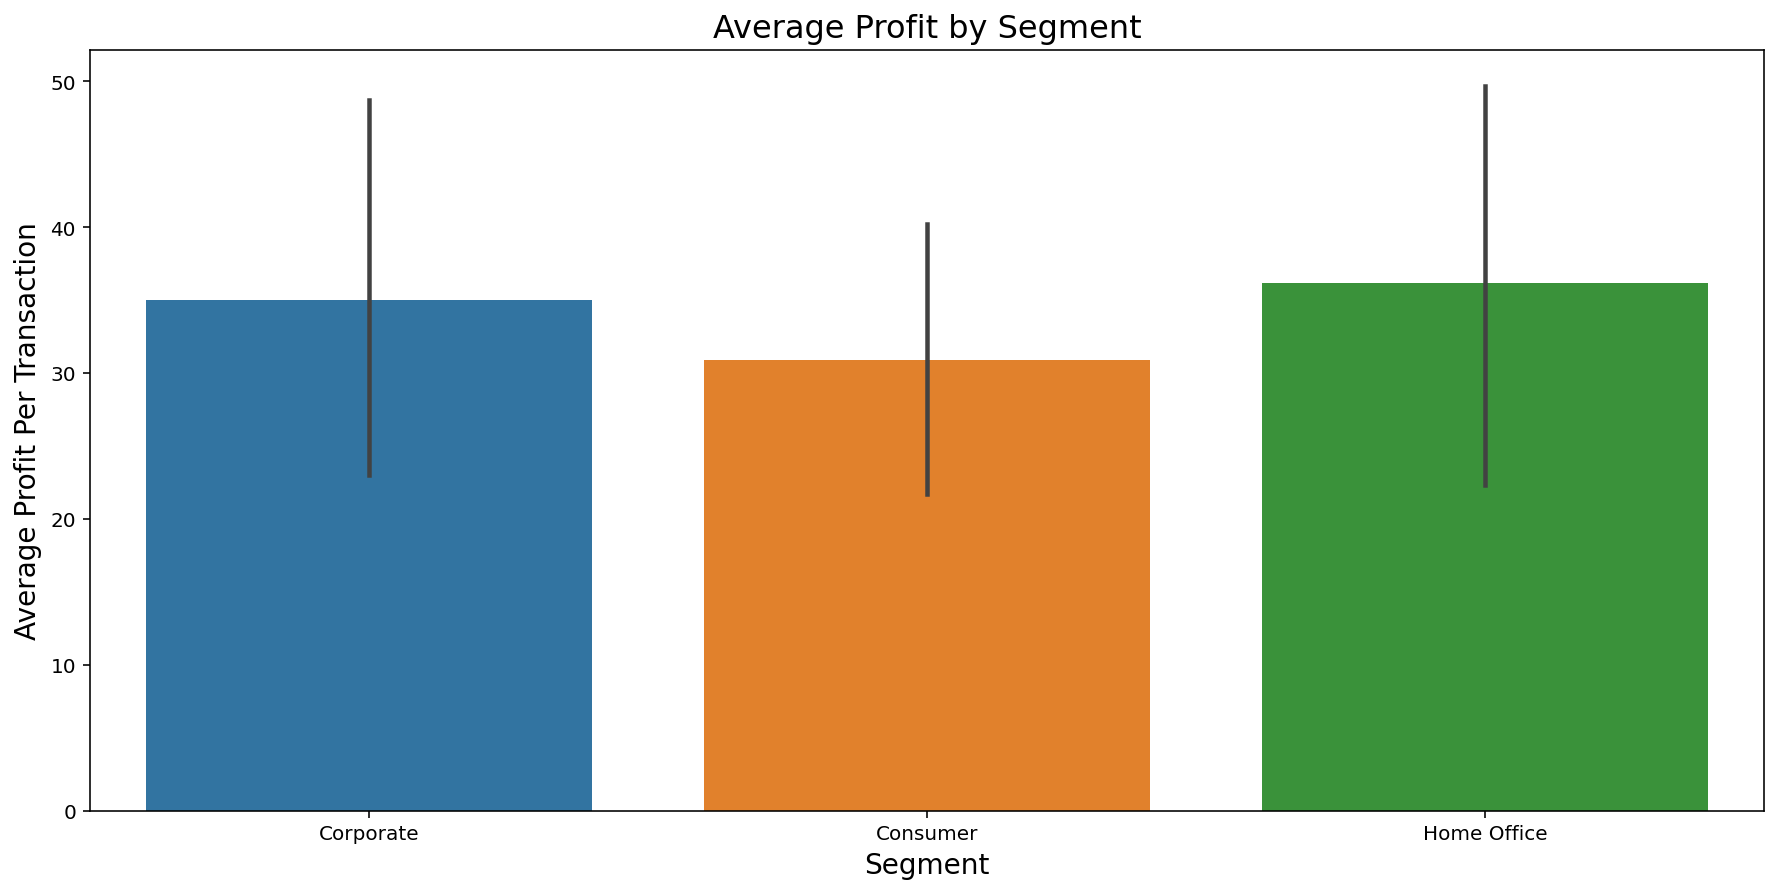

In [56]:
# Check which is the average profit per transaction by Customer Segment
# The Consumer customer segment has the least average profit per transaction

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Profit', estimator=np.mean, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Average Profit Per Transaction', fontsize=14)
ax.set_title(f'Average Profit by Segment', fontsize=16)
plt.show()


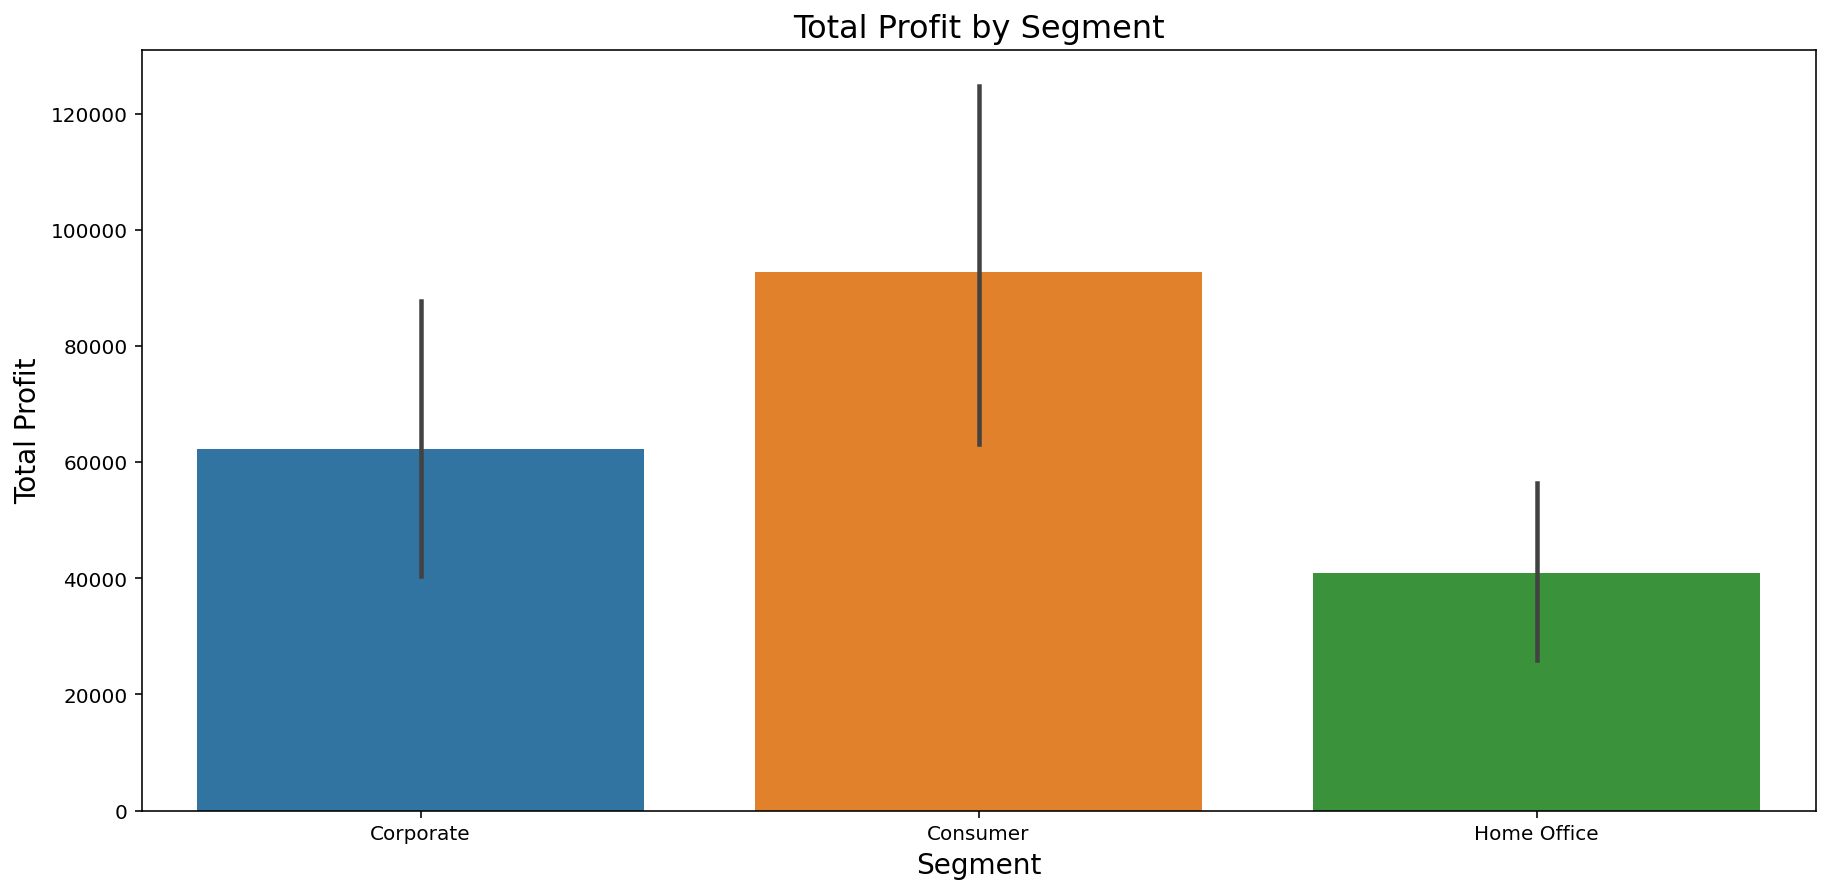

In [58]:
# Check the total profit by Customer Segment

# The Consumer Segment has the highest total Profit 

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Profit', estimator=np.sum, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Segment', fontsize=16)
plt.show()

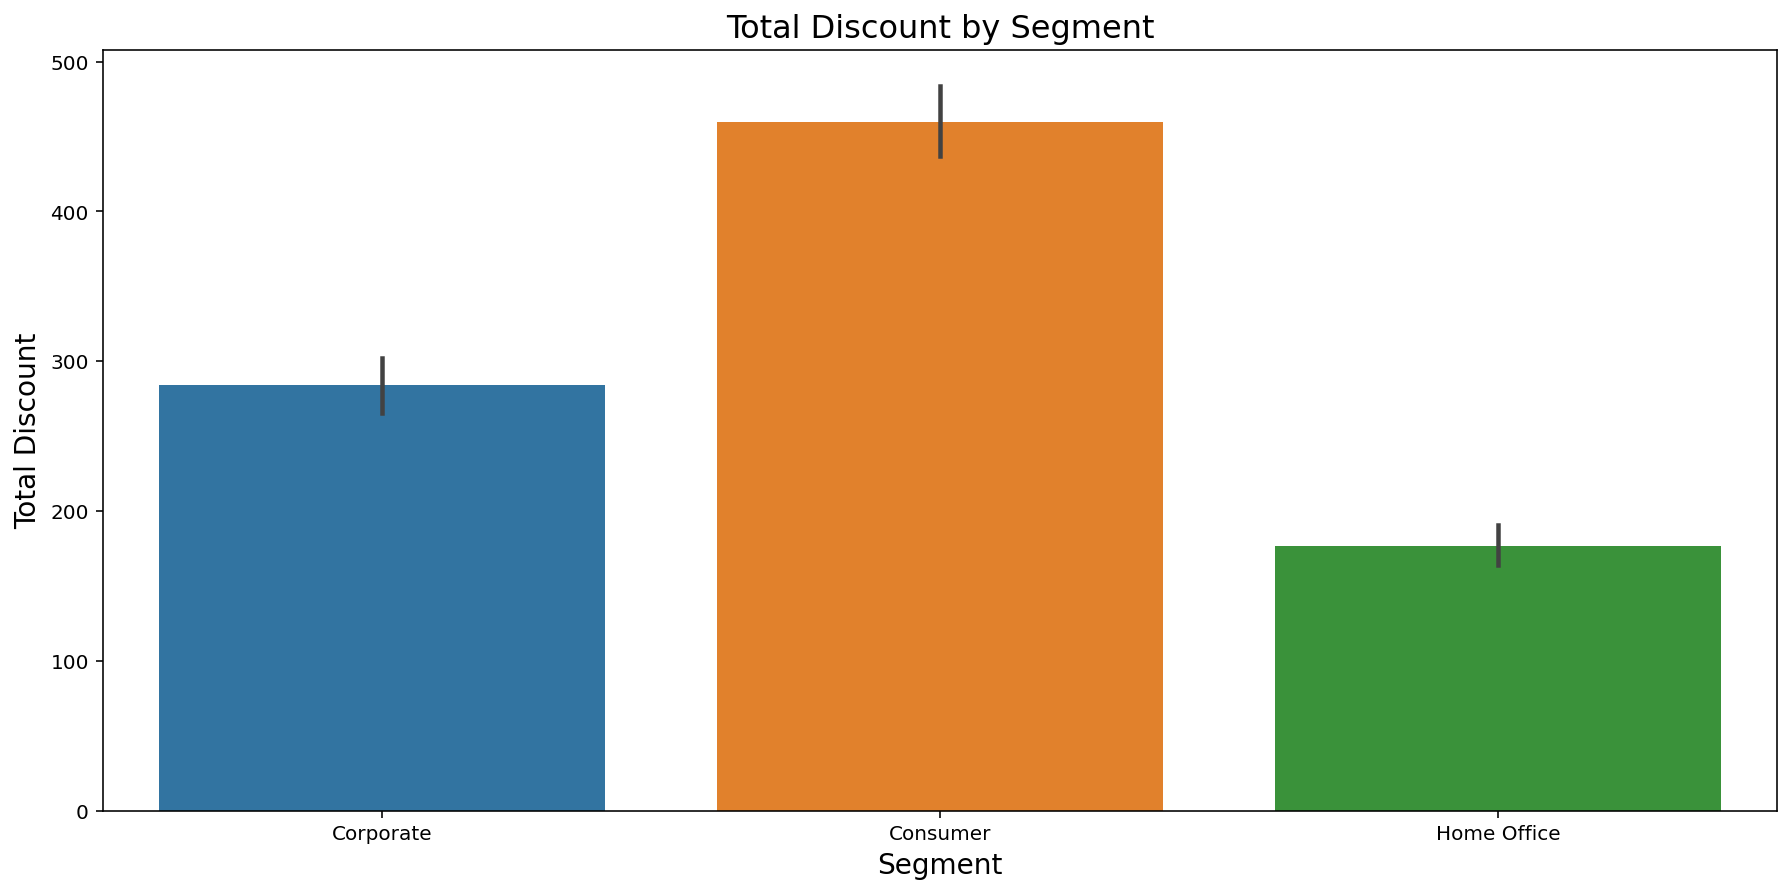

In [59]:
# Check the total amount of discount by customer Segment
# The Consumer Customer Segment has taken the largest amount of discounts and least amount of profit per transaction.
# The Home Office Segment has the least amount of discounts

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Segment', y='Discount', estimator=np.sum, hue='Segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Total Discount', fontsize=14)
ax.set_title(f'Total Discount by Segment', fontsize=16)
plt.show()


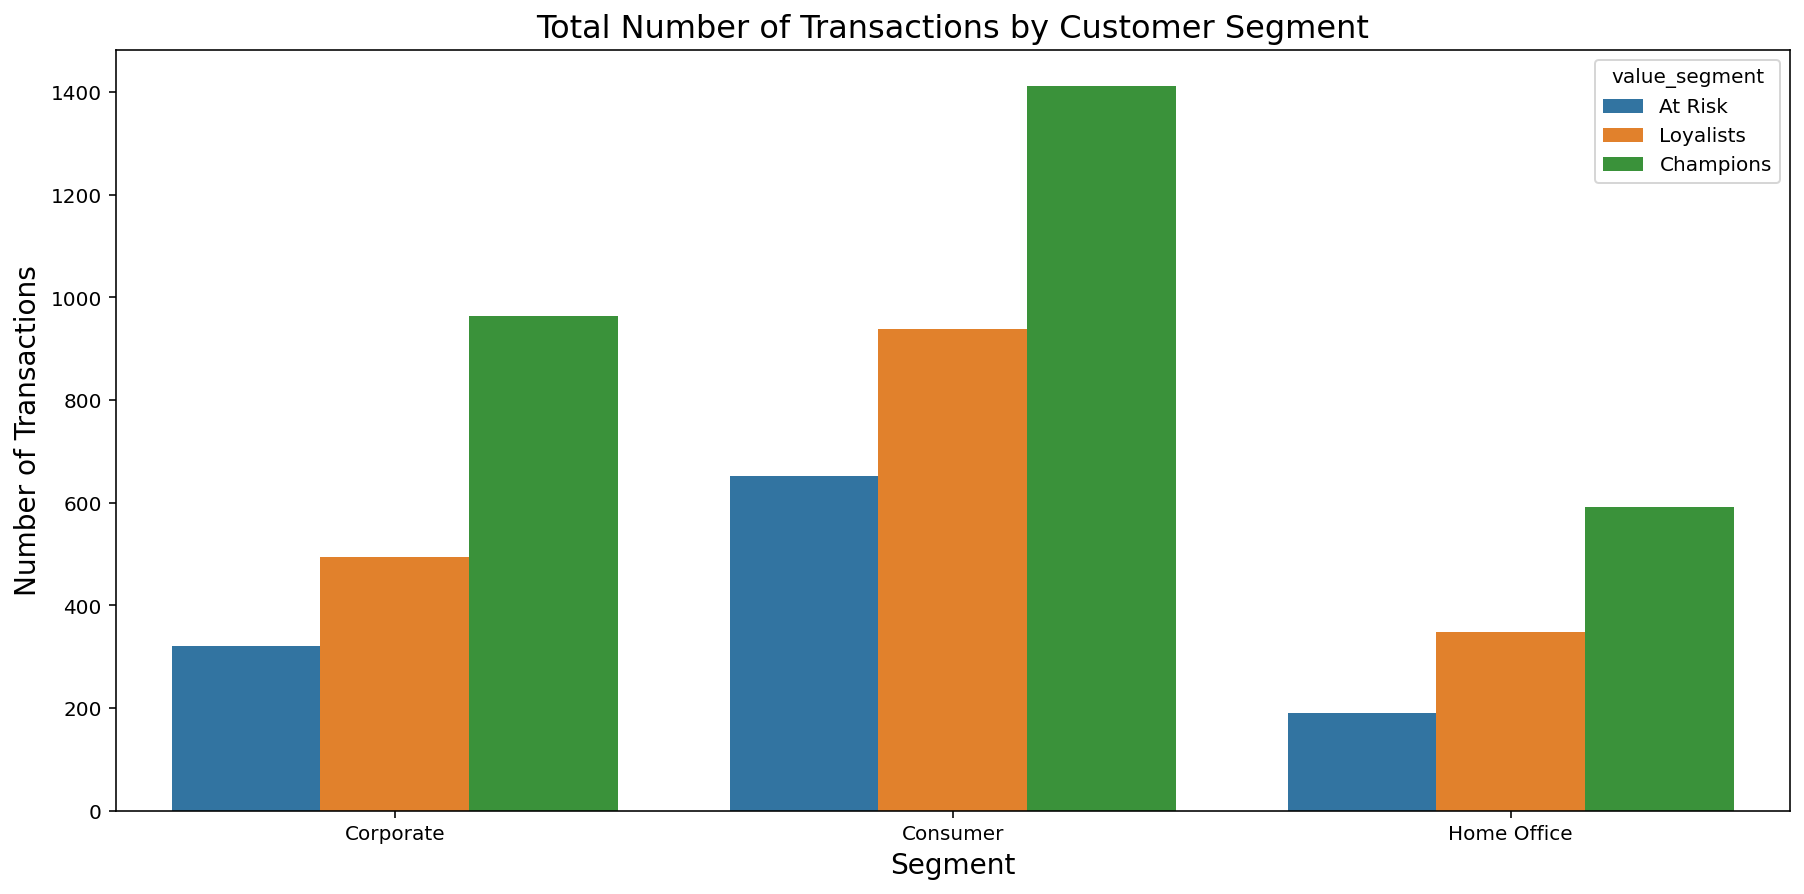

In [60]:
# Check the total number of transactions by Customer Segments by all rfm value_segments

# The Corporate Customer segment has a larger percentage of its customers in the most valuable RFM group (value segment 3)

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Segment', hue='value_segment')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel(f'Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Customer Segment', fontsize=16)
plt.show()

### **Region Analysis**



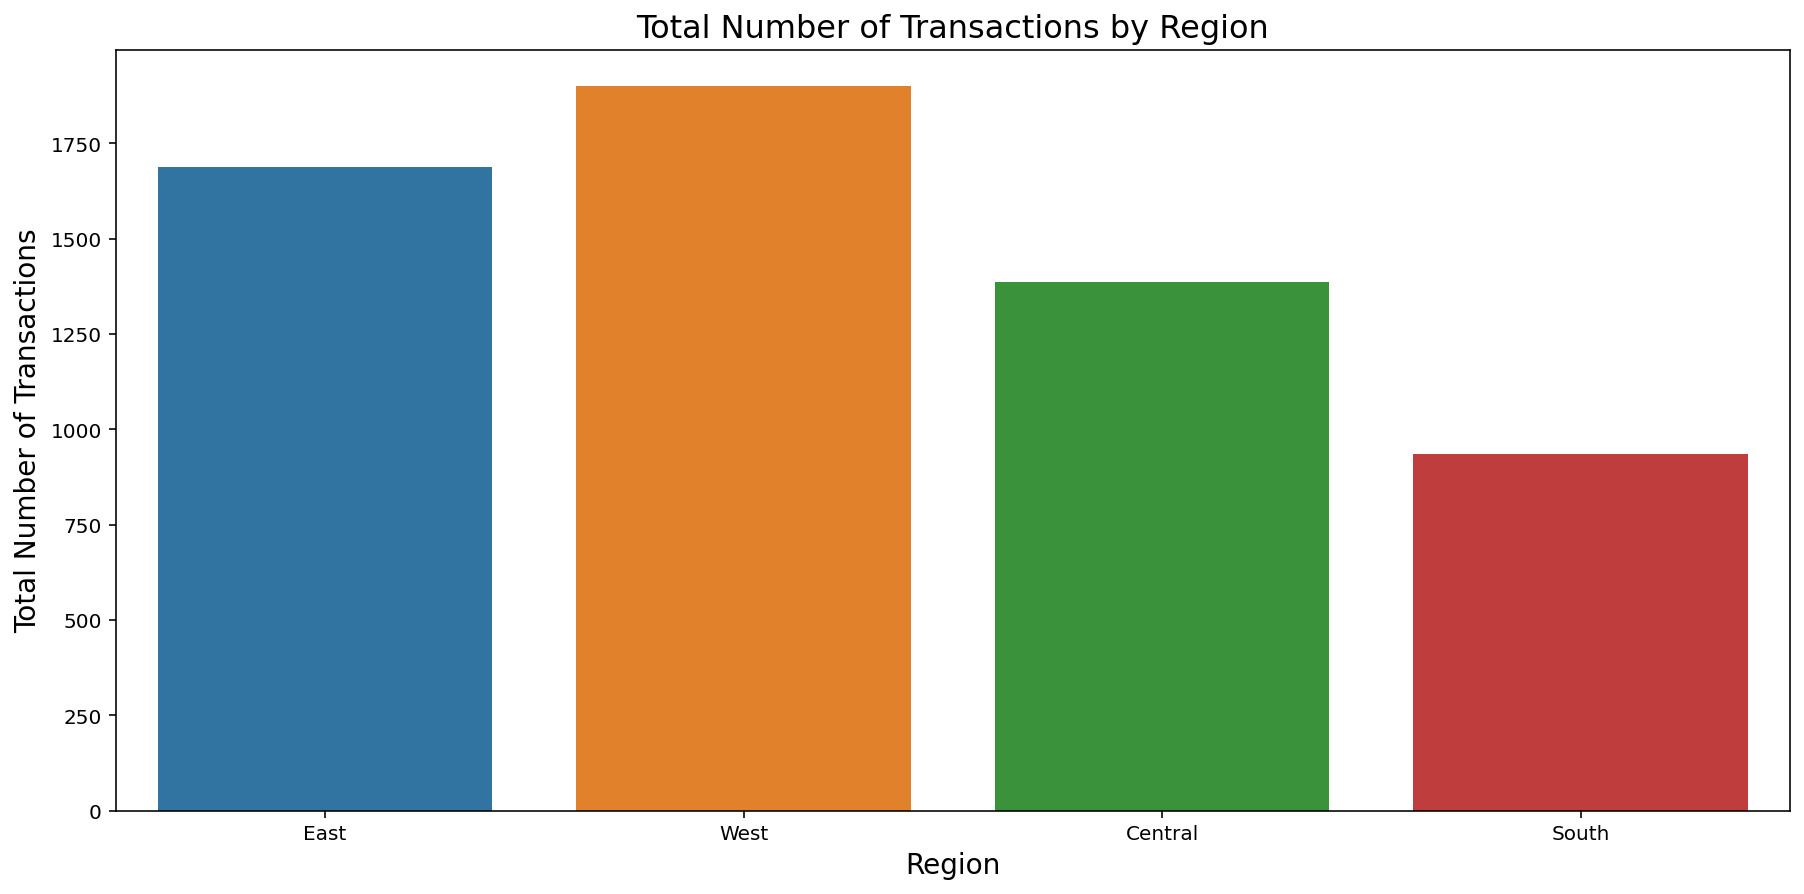

In [61]:
# Check which Region has the most number of transactions

# Customers from the Southern region have the least amount of transactions while the West Region has the highest number of transctions.

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Region', hue='Region')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Region', fontsize=16)
plt.show()


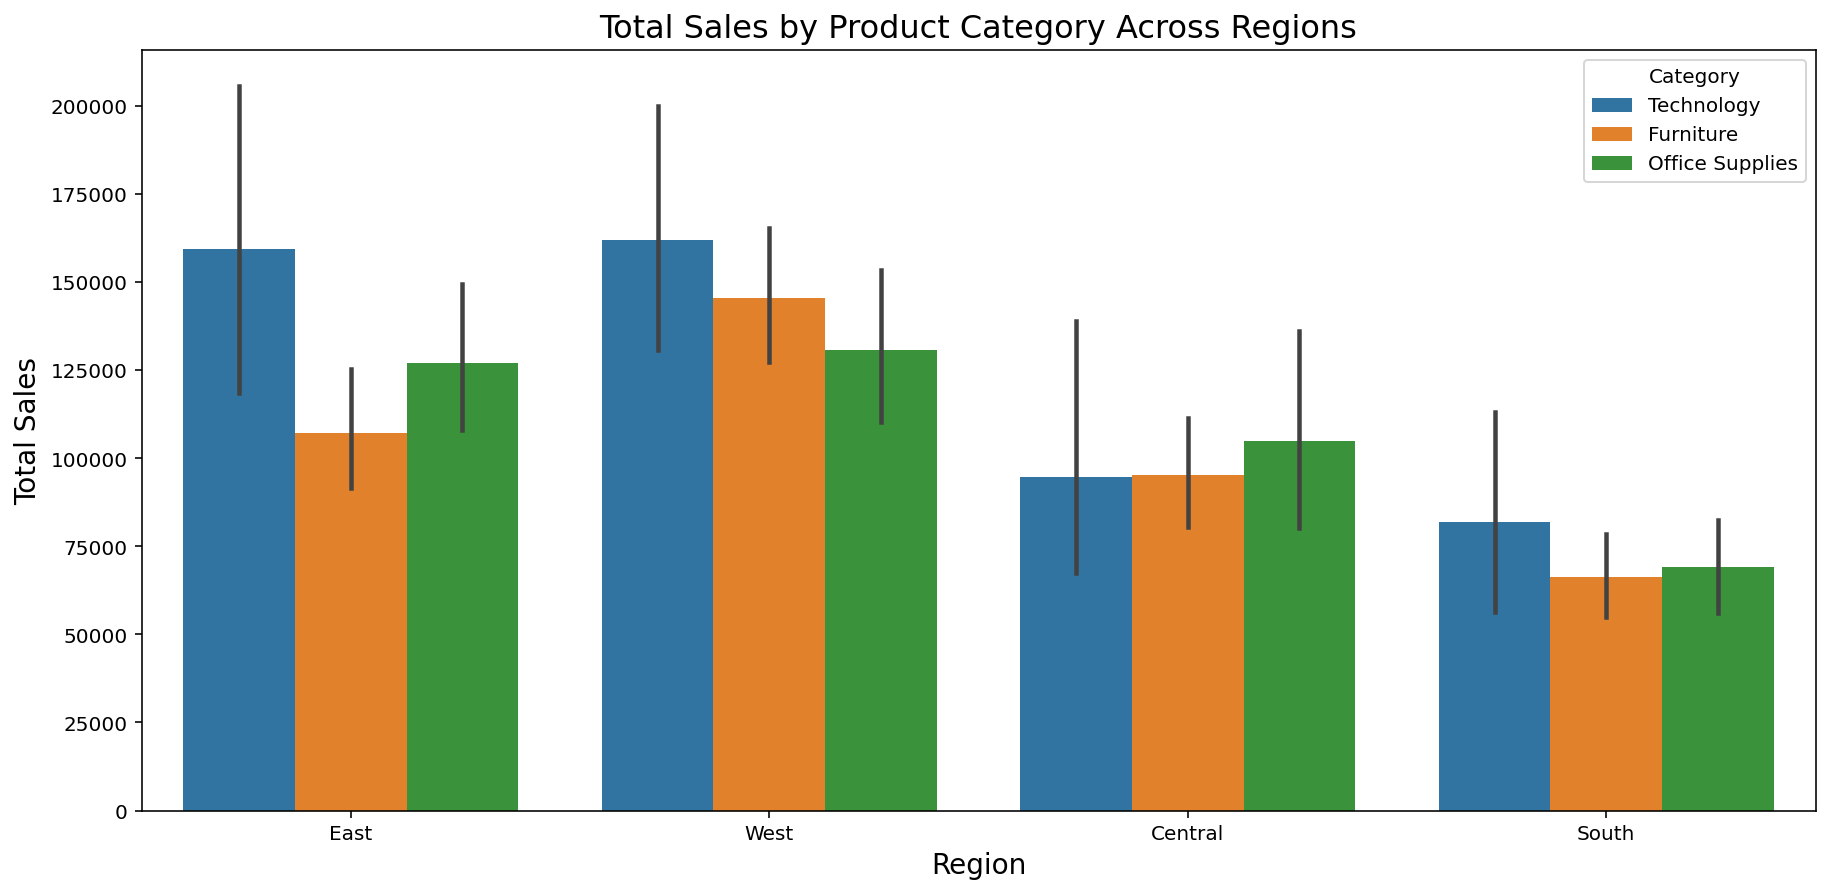

In [68]:
# Additional Insights here!!!

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Region', y='Sales', hue='Category', estimator=np.sum)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel(f'Total Sales', fontsize=14)
ax.set_title(f'Total Sales by Product Category Across Regions', fontsize=16)
plt.show()


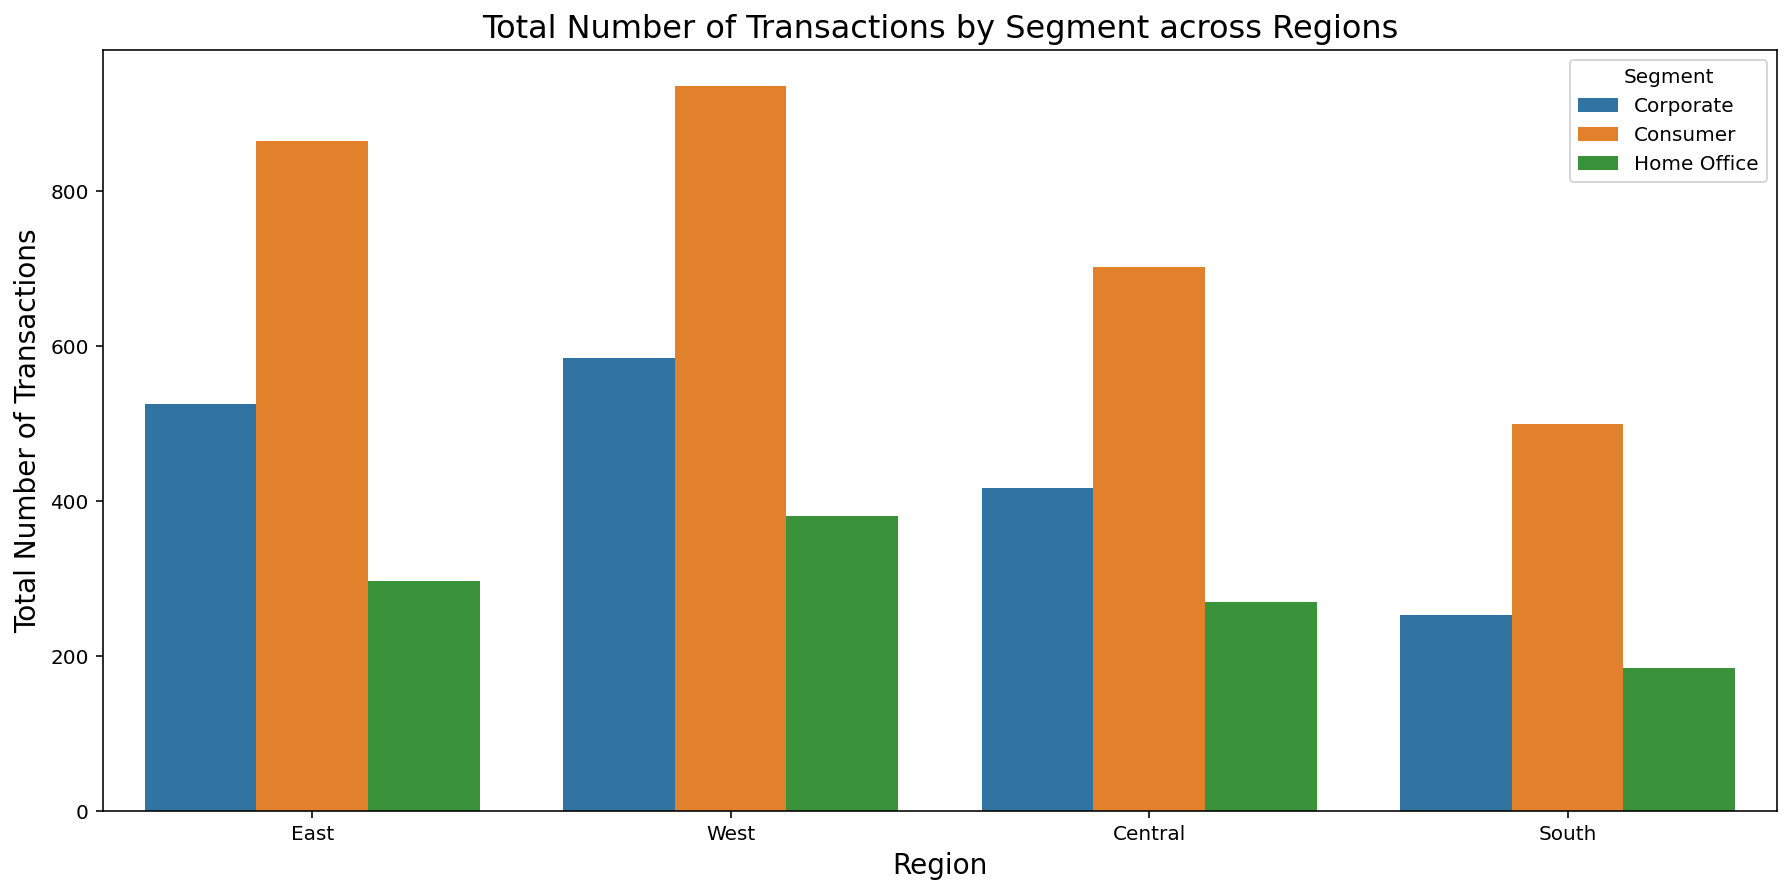

In [69]:
# Check total number of transactions by Region across customer segments

# Total number of transactions by Customer Segment follows the same pattern across all four regions

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='Region', hue='Segment')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions by Segment across Regions', fontsize=16)
plt.show()

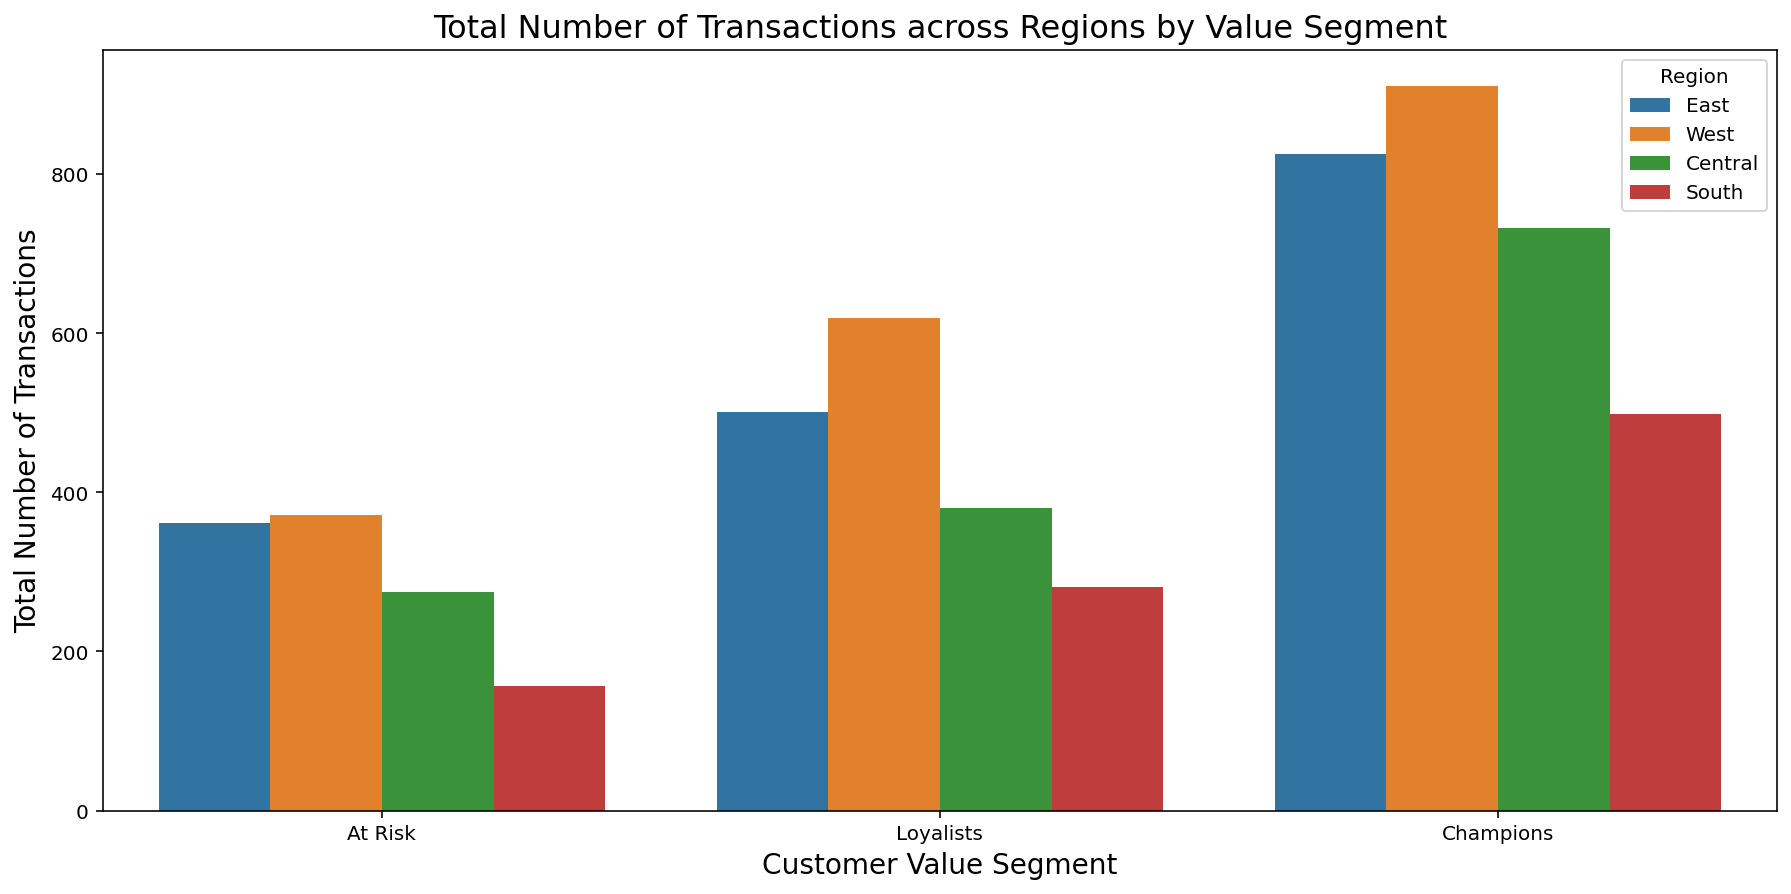

In [70]:
# Check the number of transactions by rfm value segment over all regions

# Generally, customers from the Southern region have the least amount of transactions while the West Region has the highest number of transactions.


fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=df2, x='value_segment', hue='Region')
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Number of Transactions', fontsize=14)
ax.set_title(f'Total Number of Transactions across Regions by Value Segment', fontsize=16)
plt.show()

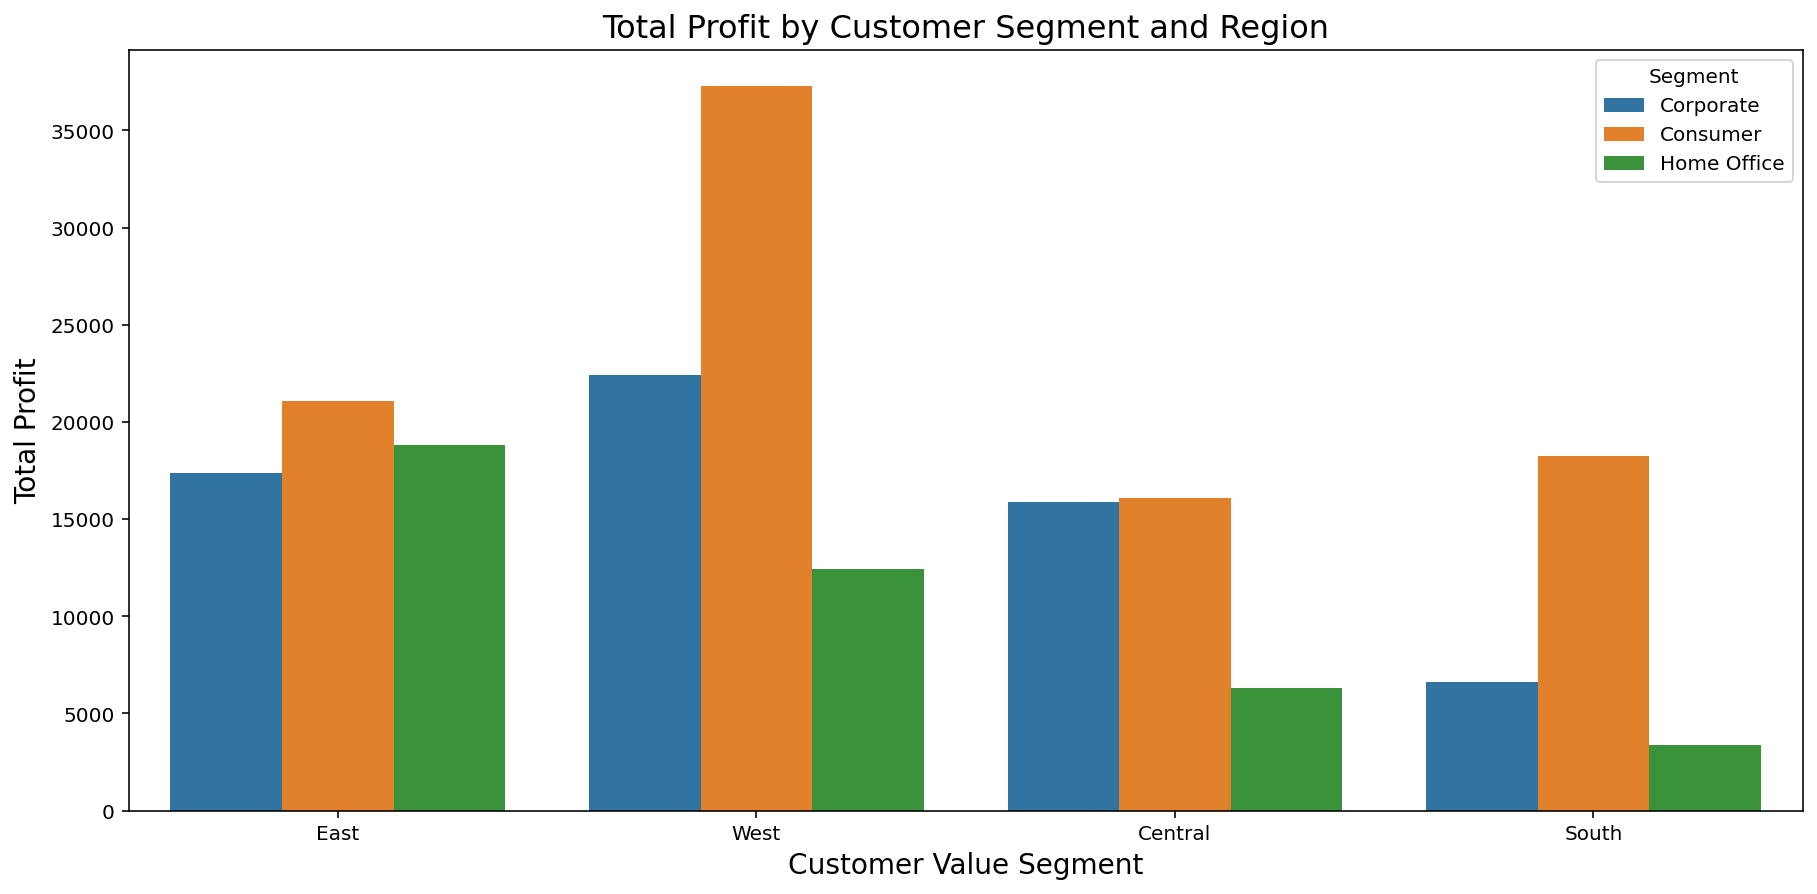

In [71]:
# Check the total profit by region across all customer segments

# The West is the most profitable region.
# The West & South Regions get most profits from the Consumer Segment. 
# The Central Region has most profits from the Corporate Segment
# The East Region appears to be the best region for Home Office customers

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='Region', y='Profit', estimator=np.sum, hue='Segment', errorbar=None)
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Profit', fontsize=14)
ax.set_title(f'Total Profit by Customer Segment and Region', fontsize=16)
plt.show()

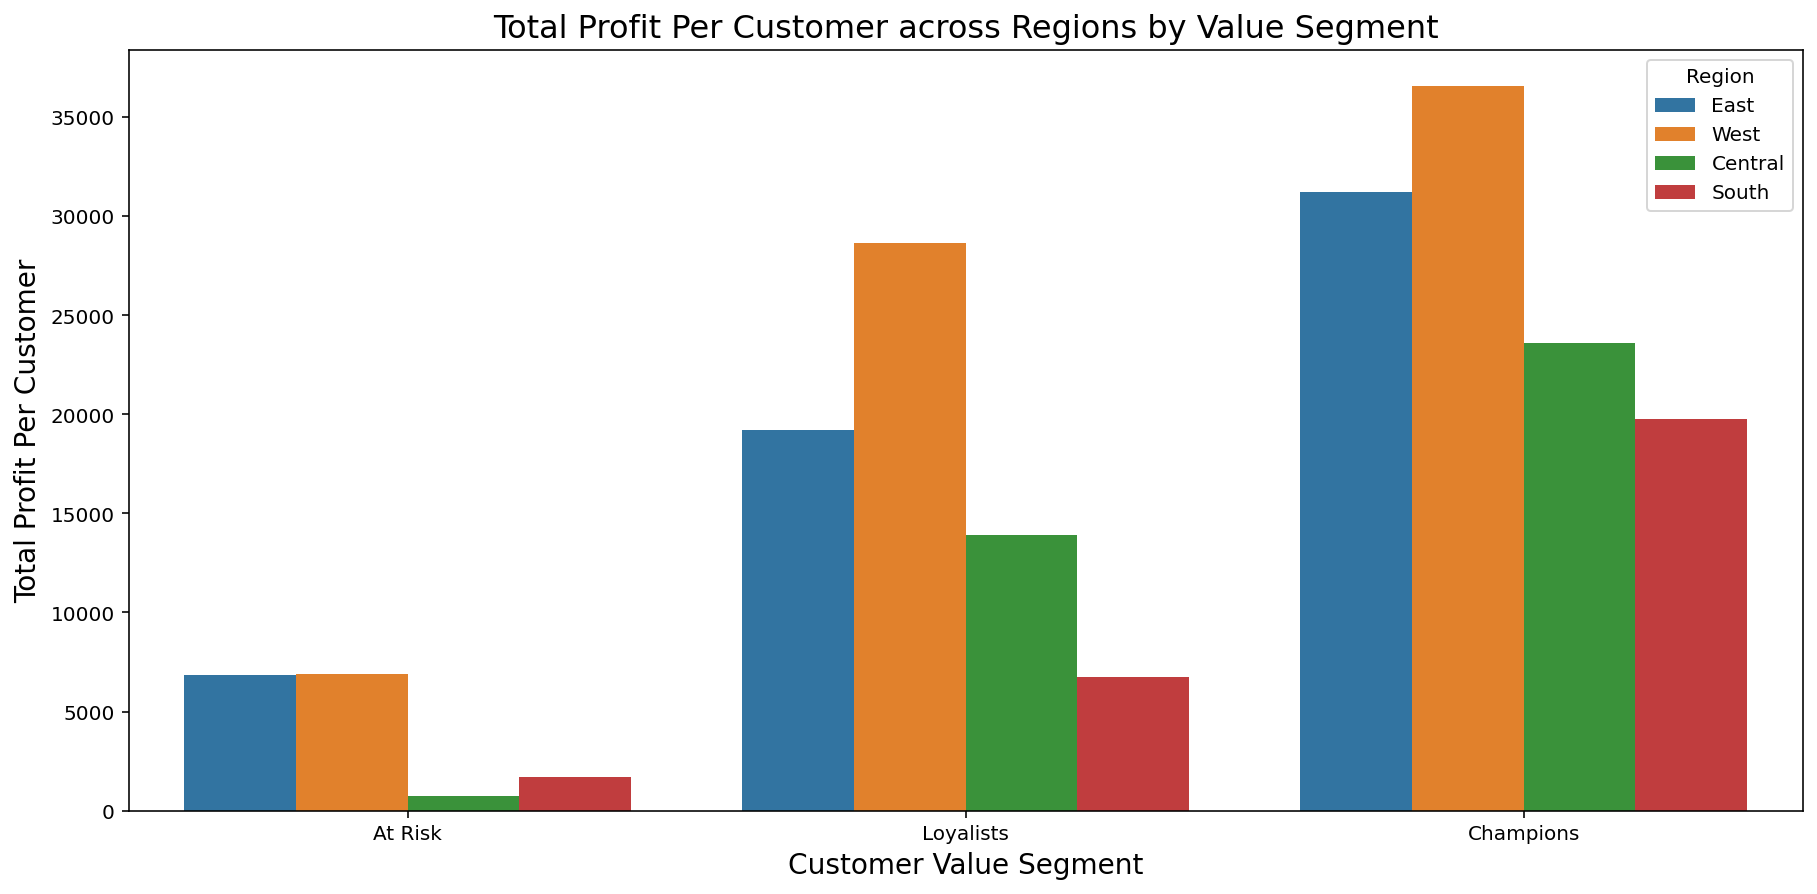

In [72]:
# Check the total profit by rfm value_segment across all regions

# The West & East Regions are the most profitable across all value Segments

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df2, x='value_segment', y='Profit', estimator=np.sum, hue='Region', errorbar=None)
ax.set_xlabel('Customer Value Segment', fontsize=14)
ax.set_ylabel(f'Total Profit Per Customer', fontsize=14)
ax.set_title(f'Total Profit Per Customer across Regions by Value Segment', fontsize=16)
plt.show()